# **EasyVisa Project**

#### **Submitted by Neha Biswas**

## **Context:**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## **Objective:**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## **Data Description**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## **Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## **Importing necessary libraries and data**

In [ ]:
# Importing libraries for reading the data manipulation:
import numpy as np
import pandas as pd

# Importing libraries for data visualization:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
# Removes the limit for the number of displayed columns:
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows:
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points:
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [ ]:
# Importing function train_test_split to split the data into train and test:
from sklearn.model_selection import train_test_split

In [ ]:
# To build decision tree model:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Importing different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier

In [ ]:
# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
# Metric Scores : to check model performance
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Function Definition for different functions used**

In [ ]:
# Function to create histogram and box plots:
def creating_hist_box(df, feature, kde= True, bins=None, figsize =(10, 4)):
      f2, (ax_hist, ax_box) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
      f2.tight_layout(pad=5.0)

      if bins:
        sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist, bins=bins)
        ax_hist.set_title(f'Histogram with bins = {bins}')
      else:
        sns.histplot(data=df, x=feature, kde=kde, ax=ax_hist)
        ax_hist.set_title(f'Histogram with default no of bins.')

      sns.boxplot(data=df, x=feature, ax=ax_box, showmeans=True, color="violet")
      ax_box.set_title('Boxplot')

In [ ]:
# Function to create labeled barplots:
def labeled_barplot(data, feature, perc=False, n=None, rotatn=0):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    rotatn: how to display x labels (default is horizontally(0), vertically(90))
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=rotatn,fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot


        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to create stacked barplots:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# Function to plot distributions wrt target:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to compute different metrics to check performance of a classification model built using sklearn:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a dtree model:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Data Overview**


In [ ]:
# Loading the data:
data = pd.read_csv('/content/drive/MyDrive/Univ_Texas/Bagging techniques/Project/EasyVisa.csv')

In [ ]:
# Displaying first 5 rows of the dataset:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


In [ ]:
# Displaying the last 5 rows of the dataset:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79000,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91000,Year,Y,Certified


Observation:

*   The datafame has 12 columns. Each row represents the visa status of an application along with various determining factors such as education level, prior experience, prevailing wage, etc.




In [ ]:
# Checking shape of the dataset:
data.shape
print(f'No. of rows in the dataset: {data.shape[0]}')
print(f'No. of columns in the dataset: {data.shape[1]}')

No. of rows in the dataset: 25480
No. of columns in the dataset: 12


Observation:

*   There are 25480 rows and 12 columns in the dataset.


In [ ]:
# Info table: Checking the datatypes of the columns for the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# List of columns with 'object' datatype:
data.select_dtypes(include='object').columns.to_list()

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

Observations:


*   The columns have int, float, and object datatypes.
*   9 columns are of object datatype.
*   2 columns that are of int datatype are no_of_employees and yr_of_estab.
*   There is only 1 column of float datatype i.e., prevailing_wage.

In [ ]:
# Checking percentage of missing values:
data.isnull().sum()/data.shape[0]

case_id                 0.00000
continent               0.00000
education_of_employee   0.00000
has_job_experience      0.00000
requires_job_training   0.00000
no_of_employees         0.00000
yr_of_estab             0.00000
region_of_employment    0.00000
prevailing_wage         0.00000
unit_of_wage            0.00000
full_time_position      0.00000
case_status             0.00000
dtype: float64

In [ ]:
# Checking for duplicate rows:
data.duplicated().sum()

0

Observations:
*   There are no missing values of data in any of the columns.
*   There are no duplicate records in the dataset.

## **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# Since 'case_id' is a primary key column, so we drop the column for further analysis:
df = data.drop('case_id', axis=1)

### **Statistical Summary of the data**

In [ ]:
# Statistical summary of the dataset:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000


In [ ]:
# Statistical summary of the dataset for 'object' columns:
df.describe(include='object').T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [ ]:
df.loc[(df['prevailing_wage'] == df['prevailing_wage'].min()) | (df['prevailing_wage'] == df['prevailing_wage'].max()), ['prevailing_wage','unit_of_wage']]

,prevailing_wage,unit_of_wage
20575,2.13670,Hour
21077,319210.27000,Year


Observations:

*   There are 25480 unique visa applicants in the dataset.
*   Highest number of applicants are from Asia.
*   Most of the applicants have Bachelor's degrees.
*   Most of the applicants have prior work experience.
*   Most of the applicants do not require job training.
*   Most of the cases are applied for jobs located in the Northeastern part of the country.
*   Most jobs are renumerated yearly.
*   Most jobs are full-time in nature.
*   The earliest year a company was established is 1800 and the latest is 2016.
*   The minimum prevailing wage is almost 2.14 USD hourly while the maximum is around 319210 USD yearly.
* Some companies have negative number of employees, which seems to suggest some anomaly in the column.
*   In most of the cases visa has been certified/approved.




In [ ]:
# Checking for any company that has 0 employees :
df.loc[df['no_of_employees']==0].shape

(0, 11)

Observations:

*   There are no companies that have 0 employees.

In [ ]:
# Checking for any company that has less than 0 employees :
df.loc[df['no_of_employees'] < 0].shape

(33, 11)

In [ ]:
# Checking percentage of rows that have negative 'no_of_employees':
df.loc[df['no_of_employees'] < 0].shape[0]/df.shape[0]

0.0012951334379905808

Observations:

*   There are 33 records that have less than 0 employees which corresponds to 0.0013% of the dataset.

In [ ]:
# Since no_of_employees cannot be negative and might have been inputted wrongly,
# we take absolute values for such no_of_employees :
df['no_of_employees'] = df['no_of_employees'].abs()

In [ ]:
df.loc[df['no_of_employees'] < 0].shape

(0, 11)

In [ ]:
df['no_of_employees'].min()

11

Observation:

*   The minimum number of employees is now 11 after having taken the absolute value of the column to remove the negative number of employees.




### **Univariate Analysis**

#### **prevailing_wage**

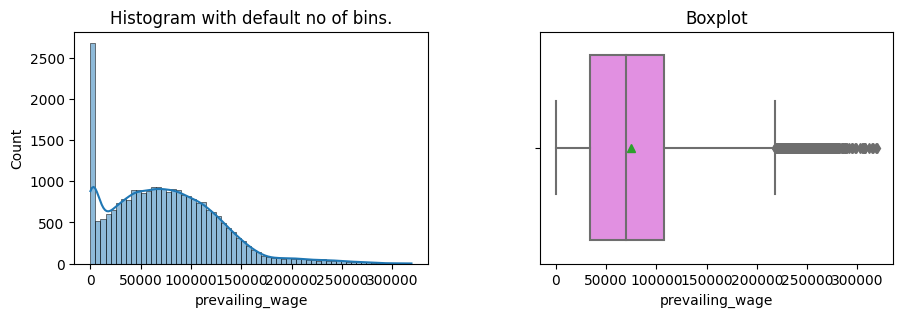

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'prevailing_wage':
creating_hist_box(df, 'prevailing_wage')

In [ ]:
df['prevailing_wage'].describe()

count    25480.00000
mean     74455.81459
std      52815.94233
min          2.13670
25%      34015.48000
50%      70308.21000
75%     107735.51250
max     319210.27000
Name: prevailing_wage, dtype: float64

Observations:

*   The distribution for prevailing wage is right skewed.
*   The average prevailing wage is \$74455.81 which is more than the median prevailing wage at \$70308.21.
*   The minimum prevailing wage is \$2.14 while the maximum prevailing wage is \$319210.27.
*   The standard deviation is \$52815.94.
*   There are outlier values on the higher end of the distribution for the column 'prevailing_wage'.







#### **no_of_employees**

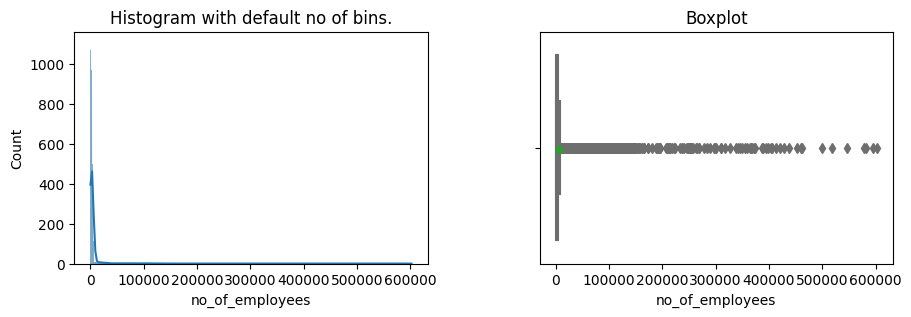

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'no_of_employees':
creating_hist_box(df, 'no_of_employees')

In [ ]:
df['no_of_employees'].describe()

count    25480.00000
mean      5667.08921
std      22877.91745
min         11.00000
25%       1022.00000
50%       2109.00000
75%       3504.00000
max     602069.00000
Name: no_of_employees, dtype: float64

Observations:

*   The distribution for the number of employees a company has is highly right-skewed.
*   The minimum number of employees a company has is 11 while the maximum number of employees is 602069.
*   On average a company has 5667 employees which is higher than the median value of 2109.
*   The standard deviation is around 22877.

#### **continent**

In [ ]:
df['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

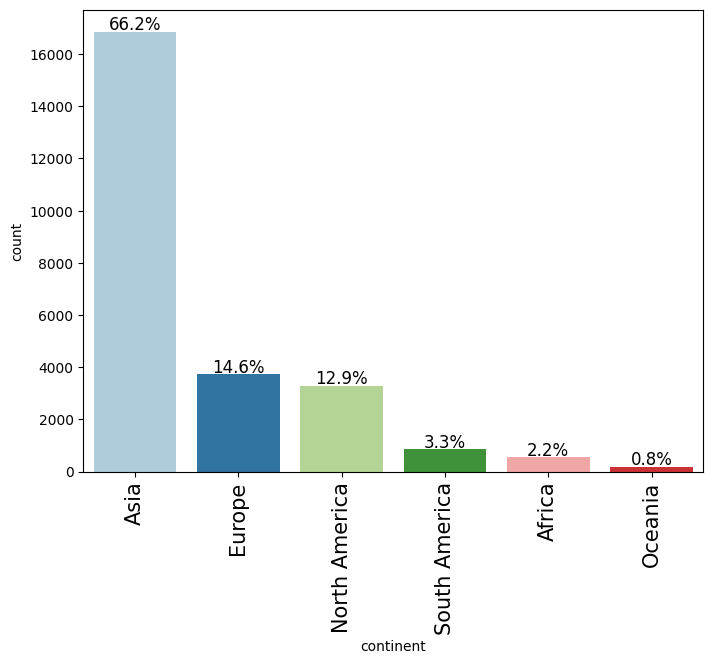

In [ ]:
# Barplot for the cloumn 'continent' in the dataset:
labeled_barplot(df, 'continent', perc=True, rotatn=90)

Observations:

*   The dataset has applicants from 6 different continents namely, Asia, Europe, North America, South America, Africa, and Oceania
*   The highest number of visa applications are from Asia, followed by Europe and North America.
*    The lowest number of visa applicants, continent-wise, are from Oceania.
*   Below table shows the percentages of applicants belonging to the different  continents:

Continent | Number of Applications | Percentage of Application (%)
--------- | ---------------------- | ----------------------------
Asia | 16861 | 66.2
Europe | 3732 | 14.6
North America | 3292 | 12.9
South America | 852 | 3.3
Africa | 551 | 2.2
Oceania | 192 | 0.8





#### **education_of_employee**

In [ ]:
df['education_of_employee'].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

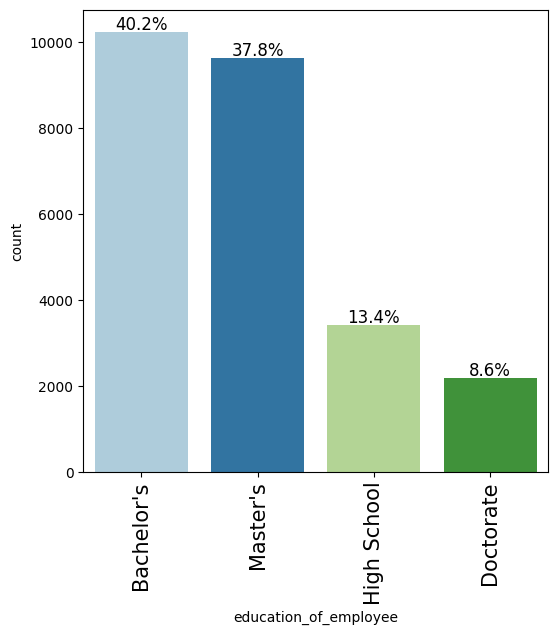

In [ ]:
# Barplot for the cloumn 'education_of_employee' in the dataset:
labeled_barplot(df, 'education_of_employee', perc=True, rotatn=90)

Observations:

*   The different education levels present in the dataset are High School degrees, Bachelor's degrees, Master's degrees, and Doctorate degrees.
*   Most visa applicants have a Bachelor's Degree, followed by Mater's degree.
*   Doctorate applicants have the lowest percentage of visa applications.
*   Below table shows the percentages of applicants concerning education levels:

Education level | Number of Applications | Percentage of Application (%)
--------- | ---------------------- | ----------------------------
Bachelor's | 10234 | 40.2
Master's | 9634 | 37.8
High School | 3420 | 13.4
Doctorate | 2192 | 8.6




#### **has_job_experience**

In [ ]:
df['has_job_experience'].value_counts()

Y    14802
N    10678
Name: has_job_experience, dtype: int64

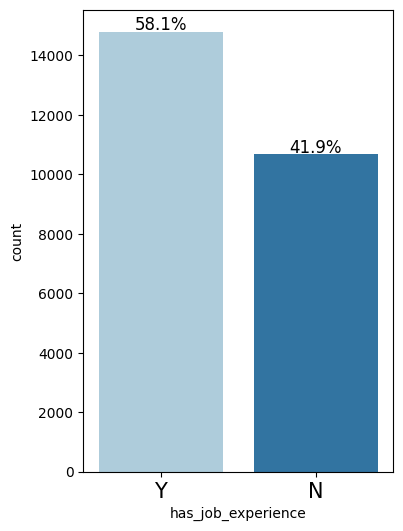

In [ ]:
# Barplot for the cloumn 'has_job_experience' in the dataset:
labeled_barplot(df, 'has_job_experience', perc=True)

Observations:

*   Most visa applicants have prior experience (58.1%).
*   Below table shows the percentages of applicants concerning job experience:

Prior Job Experience | Number of Applications | Percentage of Application (%)
--------- | ---------------------- | ----------------------------
Yes | 14802 | 58.1
No | 10687 | 41.9



#### **requires_job_training**

In [ ]:
df['requires_job_training'].value_counts()

N    22525
Y     2955
Name: requires_job_training, dtype: int64

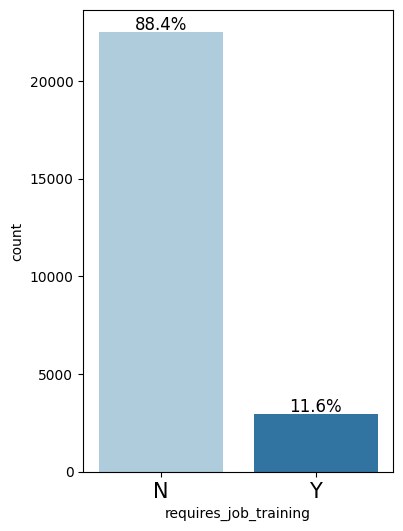

In [ ]:
# Barplot for the cloumn 'requires_job_training' in the dataset:
labeled_barplot(df, 'requires_job_training', perc=True)

Observations:

*   Most visa applicants (ie, 88.4%) do not need job training.
*   Below table shows the percentages of applicants concerning the requirement of job training:

Job Training Required  | Number of Applications | Percentage of Application (%)
--------- | ---------------------- | ----------------------------
No | 22525 | 88.4
Yes | 2955 | 11.6


#### **region_of_employment**

In [ ]:
df['region_of_employment'].value_counts()

Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64

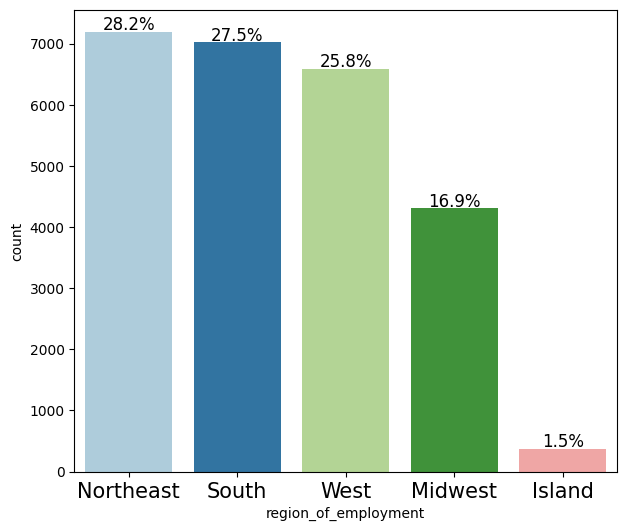

In [ ]:
# Barplot for the cloumn 'region_of_employment' in the dataset:
labeled_barplot(df, 'region_of_employment', perc=True)

Observations:

*   Most visa applications have North-Eastern US as their intended region of employment, followed by the Southern US.
*   Percentage of people applying to work in the Island region of the US is the least.
*   Below table shows the percentages of applicants concerning the intended region of employment:

Region Intended  | Number of Applications | Percentage of Application (%)
--------- | ---------------------- | ----------------------------
North-East | 7195 | 28.2
South | 7017 | 27.5
West | 6586 | 25.8
MidWest  | 4307 | 16.9
Island  | 375 | 1.5




#### **unit_of_wage**

In [ ]:
df['unit_of_wage'].value_counts()

Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64

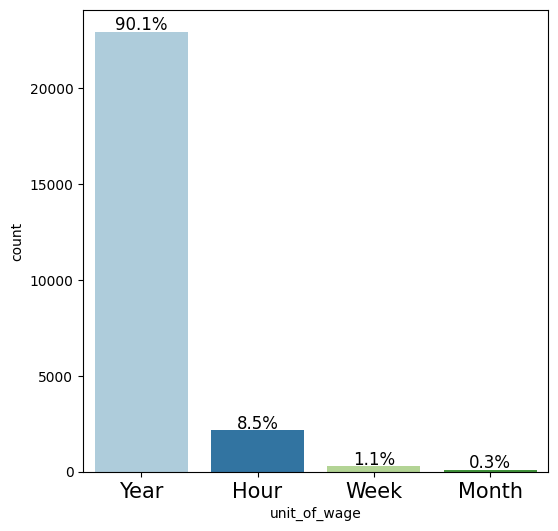

In [ ]:
# Barplot for the cloumn 'unit_of_wage' in the dataset:
labeled_barplot(df, 'unit_of_wage', perc=True)

Observations:

*   Most visa applicants are paid on a yearly basis(90.1%), followed by an hourly basis(8.5%).
*   Wage set monthly is the least common(0.3%).
*   Below table shows the percentages of applicants concerning the intended unit of wage:

Unit of Wage  | Number of Applications | Percentage of Application (%)
--------- | ---------------------- | ----------------------------
Year | 22962 | 90.1
Hour | 2157 | 8.5
Week | 272 | 1.1
Month  | 89 | 0.3





#### **full_time_position**

In [ ]:
df['full_time_position'].value_counts()

Y    22773
N     2707
Name: full_time_position, dtype: int64

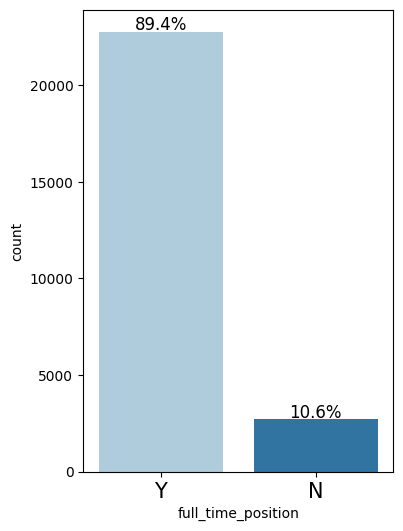

In [ ]:
# Barplot for the cloumn 'full_time_position' in the dataset:
labeled_barplot(df, 'full_time_position', perc=True)

Observations:

*   Most cases have full-time job positions (ie, 89.4%).
*   Only 10.4% of the cases do not have full-time positions.
*   Below table shows the percentages of applicants concerning work duration:

Full-time Position  | Number of Applications | Percentage of Application (%)
--------- | ---------------------- | ----------------------------
Yes | 22773 | 89.4
No | 2707 | 10.6


#### **case_status**

In [ ]:
df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

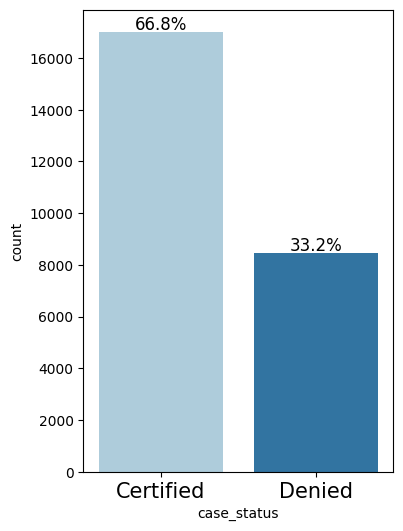

In [ ]:
# Barplot for the cloumn 'case_status' in the dataset:
labeled_barplot(df, 'case_status', perc=True)

Observations:

*   Most cases are certified (ie, 66.8% ).
*   Below table shows the percentages of applicants concerning case status:

Case Status  | Number of Applications | Percentage of Application (%)
--------- | ---------------------- | ----------------------------
Certified | 17018 | 66.8
Denied | 8462 | 33.2



#### **yr_of_estab**

In [ ]:
df['yr_of_estab'].nunique()

199

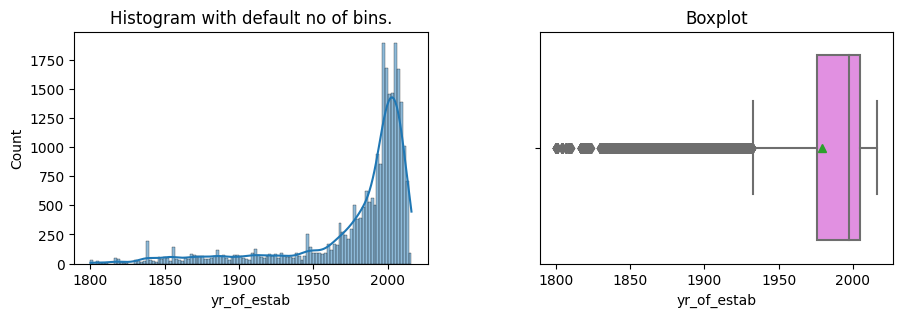

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'yr_of_estab':
creating_hist_box(df, 'yr_of_estab')

In [ ]:
df['yr_of_estab'].describe()

count   25480.00000
mean     1979.40993
std        42.36693
min      1800.00000
25%      1976.00000
50%      1997.00000
75%      2005.00000
max      2016.00000
Name: yr_of_estab, dtype: float64

Observations:

*   There are 199 unique values of the year of establishment of companies in the dataset.
*   The distribution for the columns is highly left skewed.
*   There are outlier values on the lower end of the distribution for 'year_of_estab'.
*   The oldest year of establishment in the dataset is 1800, while the latest is 2016.


### **Multivariate Analysis**

#### **Correlation between the variables**

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

df_corr = df[cols_list].corr()
df_corr

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.00000,-0.01777,-0.00952
yr_of_estab,-0.01777,1.00000,0.01234
prevailing_wage,-0.00952,0.01234,1.00000


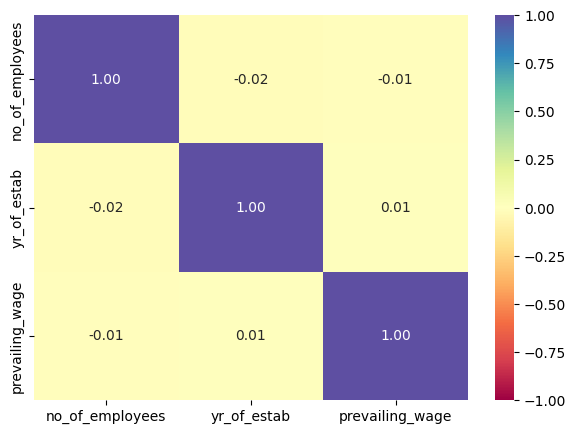

In [ ]:
#Heatmap showing correlation values between different variables.
plt.figure(figsize=(7, 5))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

*   No significant values of high correlation among variables were observed.
*   Positively correlated variables are:

Variables | Correlation Value
----------|-------------------
prevailing_wage & yr_of_estab | 0.01

*   Negatively correlated variables are:

Variables | Correlation Value
----------|-------------------
yr_of_estab & no_of_employees | -0.02
prevailing_wage & no_of_employees | -0.01

#### **unit_of_wage vs prevailing wage**

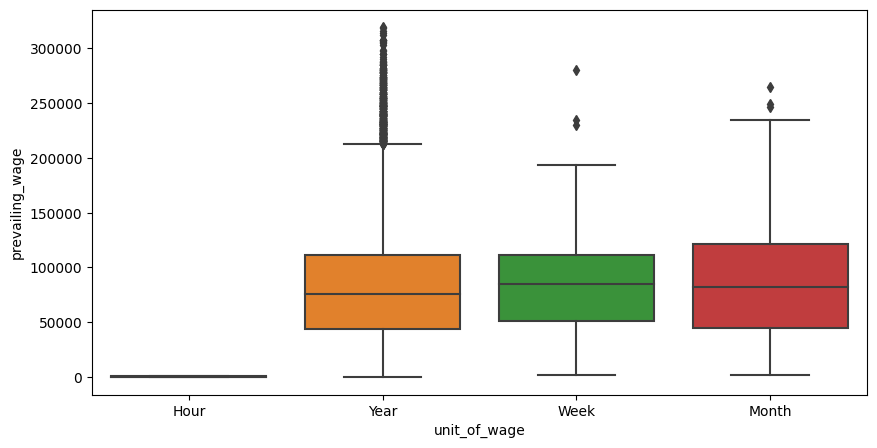

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df, x='unit_of_wage', y='prevailing_wage')
plt.show()

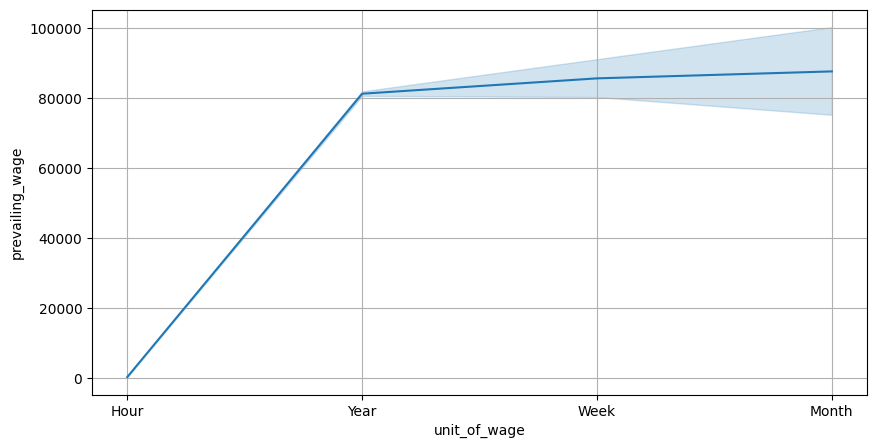

In [ ]:
plt.figure(figsize = (10,5))
sns.lineplot(data=df, x='unit_of_wage', y='prevailing_wage')
plt.grid()
plt.show()

In [ ]:
df.loc[df['unit_of_wage']=='Hour','prevailing_wage'].describe()

count   2157.00000
mean     414.57051
std      275.01500
min        2.13670
25%      152.70030
50%      372.65230
75%      637.31110
max      999.91950
Name: prevailing_wage, dtype: float64

In [ ]:
df.loc[df['unit_of_wage']=='Week','prevailing_wage'].describe()

count      272.00000
mean     85606.82051
std      44802.70481
min       2183.23000
25%      51408.27750
50%      85075.82000
75%     111331.91000
max     280175.95000
Name: prevailing_wage, dtype: float64

In [ ]:
df.loc[df['unit_of_wage']=='Month','prevailing_wage'].describe()

count       89.00000
mean     87592.86404
std      59525.12492
min       1599.28000
25%      44986.24000
50%      81826.01000
75%     121629.60000
max     264362.95000
Name: prevailing_wage, dtype: float64

In [ ]:
df.loc[df['unit_of_wage']=='Year','prevailing_wage'].describe()

count    22962.00000
mean     81228.07713
std      49951.47322
min        100.00000
25%      43715.95500
50%      76174.50000
75%     111341.96000
max     319210.27000
Name: prevailing_wage, dtype: float64

Observations:

*   The average value of prevailing wage increases with the different units of wages as:

Unit of Wage| Average Prevailing Wage ($)
------------|---------------------------
Hour | 414.57
Year | 81228.08
Week | 85606.82
Month | 87592.86

*   On an Hourly basis, the average wage paid ranges from \$2.13 to \$999.9. The median value of the prevailing wage is \$372.65.
* Weekly, the average wage paid ranges from \$2183.23 to \$280175.95. The median value of prevailing wage is \$85075.82.
* Monthly, the average wage paid ranges from \$1599.28 to \$264362.95. The median value of prevailing wage is \$81826.01.
* Yearly, the average wage paid ranges from \$100 to \$319210.27. The median value of prevailing wage is \$76174.5.


#### **region_of_employment vs education_of_employee**

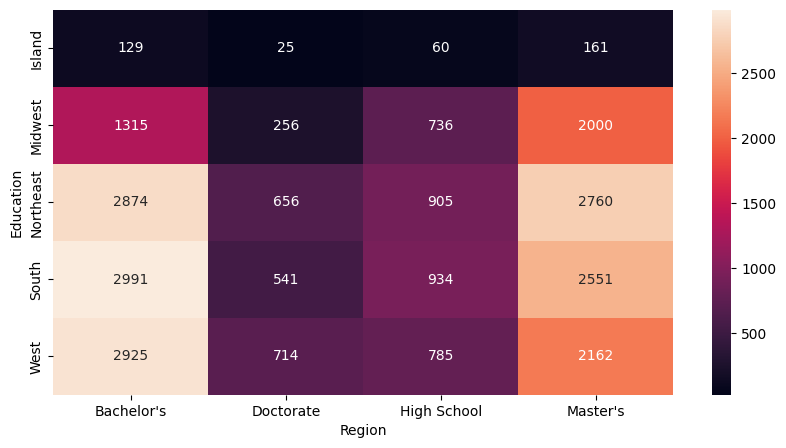

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['region_of_employment'],df['education_of_employee']),
    annot=True,
    fmt="g",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

In [ ]:
reg_edu_1 = df.groupby(['region_of_employment','education_of_employee']).agg(number_of_application=('education_of_employee','count'))
g_1 = reg_edu_1['number_of_application'].groupby('region_of_employment', group_keys=False)
g_1.apply(lambda x: x.sort_values(ascending=False))


region_of_employment  education_of_employee
Island                Master's                  161
                      Bachelor's                129
                      High School                60
                      Doctorate                  25
Midwest               Master's                 2000
                      Bachelor's               1315
                      High School               736
                      Doctorate                 256
Northeast             Bachelor's               2874
                      Master's                 2760
                      High School               905
                      Doctorate                 656
South                 Bachelor's               2991
                      Master's                 2551
                      High School               934
                      Doctorate                 541
West                  Bachelor's               2925
                      Master's                 2162
                    

In [ ]:
reg_edu_2 = df.groupby(['education_of_employee','region_of_employment']).agg(number_of_application=('education_of_employee','count'))
g_2 = reg_edu_2['number_of_application'].groupby('education_of_employee', group_keys=False)
g_2.apply(lambda x: x.sort_values(ascending=False))

education_of_employee  region_of_employment
Bachelor's             South                   2991
                       West                    2925
                       Northeast               2874
                       Midwest                 1315
                       Island                   129
Doctorate              West                     714
                       Northeast                656
                       South                    541
                       Midwest                  256
                       Island                    25
High School            South                    934
                       Northeast                905
                       West                     785
                       Midwest                  736
                       Island                    60
Master's               Northeast               2760
                       South                   2551
                       West                    2162
                    

Observations:

*   Following table shows the most and least sought-after education levels per region:

Region | Most Sought-After Level of Education | Least Sought-After Level of Education
-------|--------------------|--------------------
North-East | Bachelor's | Doctorate
South | Bachelor's | Doctorate
West | Bachelor's | Doctorate
Mid-West | Master's | Doctorate
Island | Master's | Doctorate

*   Following table shows the most and least popular intended employment regions by education level:

Education Level | Most Popular Region | Least Popular Region
-------|--------------------|--------------------
Bachelor's | South | Island
Master's | North-East | Island
High School | South | Island
Doctorate | West | Island





#### **has_job_experience vs requires_job_training**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


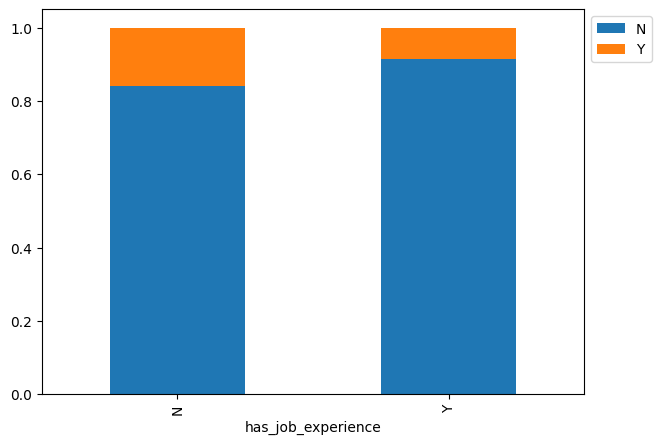

In [ ]:
stacked_barplot(df, "has_job_experience", "requires_job_training")

In [ ]:
# Calculating percentage of applicants who have prior experience and require training
experienced = df.loc[df['has_job_experience']=='Y']
experienced['requires_job_training'].value_counts()/experienced.shape[0] * 100

N   91.45386
Y    8.54614
Name: requires_job_training, dtype: float64

In [ ]:
# Calculating percentage of applicants who do not have prior experience and require training
not_experienced = df.loc[df['has_job_experience']=='N']
not_experienced['requires_job_training'].value_counts()/not_experienced.shape[0] * 100

N   84.17307
Y   15.82693
Name: requires_job_training, dtype: float64

Observations:

*   Percentage of applicants who require job training is more in the case of applicants who do not have prior experience than those who have prior experience.
*   Following table shows the percentage of applicants who requires training concerning prior experience:

Requires Job Training | Prior Experience | Percentage of Applicants (%)
-----------------|-----------------------|-------------------------
Yes | Yes | 8.55
Yes | No | 15.83
No | Yes | 91.45
No | No | 84.17




#### **continent vs case_status**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


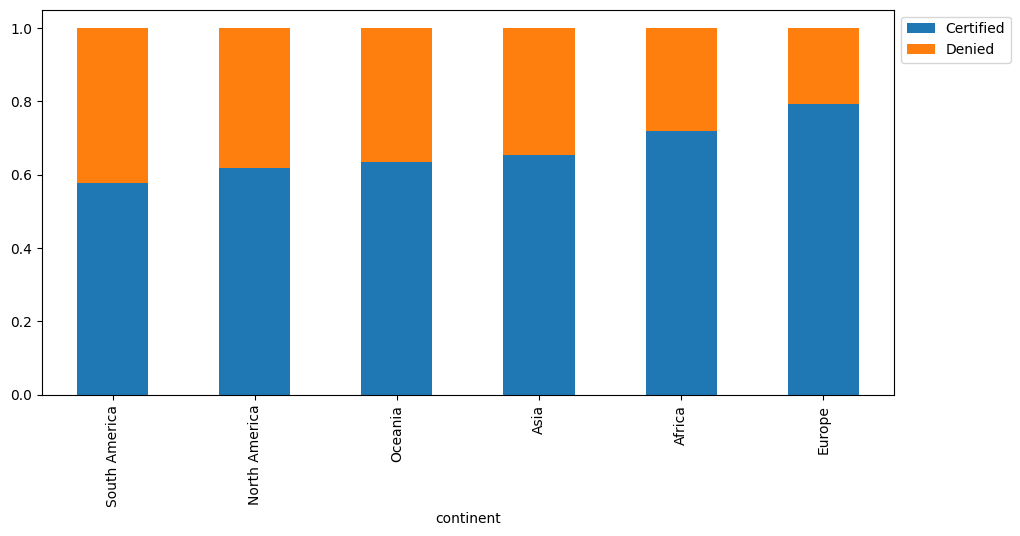

In [ ]:
stacked_barplot(df, "continent", "case_status")

In [ ]:
case_by_continents_df = df.groupby(['continent','case_status']).agg(no_of_cases=('case_status','count'))
continents_total = df.groupby('continent').agg(total_cases=('continent','count'))
case_by_continents_df = case_by_continents_df.merge(continents_total, left_index=True, right_index=True).reset_index()
case_by_continents_df['percentage'] = case_by_continents_df['no_of_cases']/case_by_continents_df['total_cases'] *100

In [ ]:
case_by_continents_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,continent,case_status,no_of_cases,total_cases,percentage
4,Europe,Certified,2957,3732,79.23365
0,Africa,Certified,397,551,72.05082
2,Asia,Certified,11012,16861,65.31048
8,Oceania,Certified,122,192,63.54167
6,North America,Certified,2037,3292,61.87728
10,South America,Certified,493,852,57.86385


In [ ]:
case_by_continents_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,continent,case_status,no_of_cases,total_cases,percentage
11,South America,Denied,359,852,42.13615
7,North America,Denied,1255,3292,38.12272
9,Oceania,Denied,70,192,36.45833
3,Asia,Denied,5849,16861,34.68952
1,Africa,Denied,154,551,27.94918
5,Europe,Denied,775,3732,20.76635


Observations:

*   Europe has the highest percentage of certified visa applications followed by Africa and Asia.
*   South America has the highest percentage of denied visa applications followed by North America and Oceania. In other words, South America, North America, and Oceania have the lowest percentage of certified visa applications.
*   Following table gives the continents with the highest percentages of visa applications that are certified:

Continent | Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Europe | 79.23
Africa | 72.05
Asia | 65.31

*   Following table gives the continents with highest percentages of visa applications that are denied:

Continent | Percentage of Denied Visa Applications (%)
----------|------------------------------------------
South America | 42.14
North America | 38.12
Oceania | 36.46




#### **education_of_employee vs case_status**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


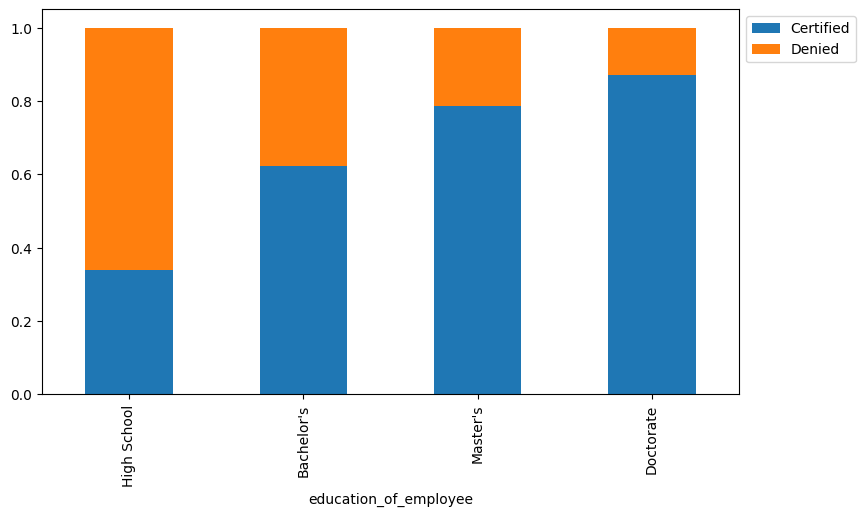

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

In [ ]:
case_by_education_df = df.groupby(['education_of_employee','case_status']).agg(no_of_cases=('case_status','count'))
education_total = df.groupby('education_of_employee').agg(total_cases=('education_of_employee','count'))
case_by_education_df = case_by_education_df.merge(education_total, left_index=True, right_index=True).reset_index()
case_by_education_df['percentage'] = case_by_education_df['no_of_cases']/case_by_education_df['total_cases'] *100

In [ ]:
case_by_education_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,education_of_employee,case_status,no_of_cases,total_cases,percentage
2,Doctorate,Certified,1912,2192,87.22628
6,Master's,Certified,7575,9634,78.62778
0,Bachelor's,Certified,6367,10234,62.21419
4,High School,Certified,1164,3420,34.03509


In [ ]:
case_by_education_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,education_of_employee,case_status,no_of_cases,total_cases,percentage
5,High School,Denied,2256,3420,65.96491
1,Bachelor's,Denied,3867,10234,37.78581
7,Master's,Denied,2059,9634,21.37222
3,Doctorate,Denied,280,2192,12.77372


Observations:

*   Applicants with a doctorate have the highest percentage of certified visa applications followed by those with a Master's degree.
*   Applicants with a High School degree have the highest percentage of denied visa applications followed by those with a Bachelor's degree. In other words, applicants with High School and Bachelor's degrees have the lowest percentage of certified visa applications.
*   Following table gives the percentages of visa applications that are certified concerning education levels:

Continent | Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Doctorate | 87.23
Master's | 78.63
Bachelor's | 62.21
High School | 34.06

*   With increase in education level of the applicant, chances of visa approval increases.


#### **has_job_experience vs case_status**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


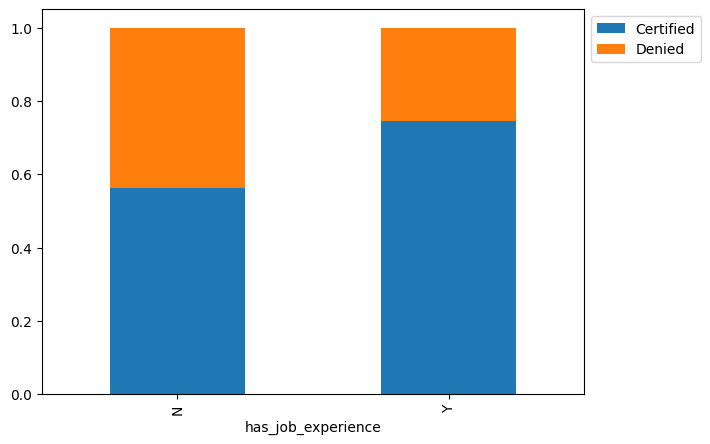

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")

In [ ]:
case_by_job_exp_df = df.groupby(['has_job_experience','case_status']).agg(no_of_cases=('case_status','count'))
job_exp_total = df.groupby('has_job_experience').agg(total_cases=('has_job_experience','count'))
case_by_job_exp_df = case_by_job_exp_df.merge(job_exp_total, left_index=True, right_index=True).reset_index()
case_by_job_exp_df['percentage'] = case_by_job_exp_df['no_of_cases']/case_by_job_exp_df['total_cases'] *100

In [ ]:
case_by_job_exp_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,has_job_experience,case_status,no_of_cases,total_cases,percentage
2,Y,Certified,11024,14802,74.47642
0,N,Certified,5994,10678,56.13411


In [ ]:
case_by_job_exp_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,has_job_experience,case_status,no_of_cases,total_cases,percentage
1,N,Denied,4684,10678,43.86589
3,Y,Denied,3778,14802,25.52358


Observations:

*   Applicants with prior job experience have the highest percentage of certified visa applications (ie, 74.48%).
*    Applicants without prior job experience have a higher percentage of denied visa applications (ie, 43.57%) as compared to those with prior job experience (ie, 25.52%).
*    Applicants without prior job experience have a lower percentage of certified visa applications (ie, 56.13%) as compared to those with prior job experience (ie, 74.48%).
*   Following table gives the percentages of visa statuses concerning prior job experience:

Prior Job Experience | Visa Status |Percentage of Visa Applications (%)
----------|------------|------------------------------------------
Yes | Certified | 74.48
No | Certified | 56.14
Yes | Denied | 25.52
No | Denied | 43.87

*   Chances of visa certification increase if the applicant has prior work experience.

#### **requires_job_training vs case_status**

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


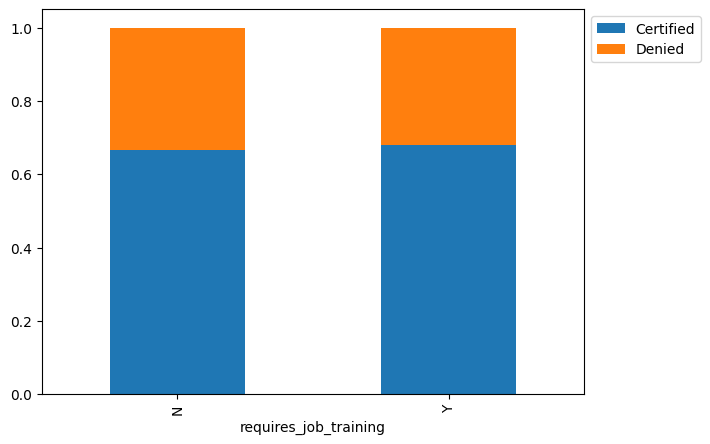

In [ ]:
stacked_barplot(df, "requires_job_training", "case_status")

In [ ]:
case_by_job_train_df = df.groupby(['requires_job_training','case_status']).agg(no_of_cases=('case_status','count'))
job_train_total = df.groupby('requires_job_training').agg(total_cases=('requires_job_training','count'))
case_by_job_train_df = case_by_job_train_df.merge(job_train_total, left_index=True, right_index=True).reset_index()
case_by_job_train_df['percentage'] = case_by_job_train_df['no_of_cases']/case_by_job_train_df['total_cases'] *100

In [ ]:
case_by_job_train_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,requires_job_training,case_status,no_of_cases,total_cases,percentage
2,Y,Certified,2006,2955,67.88494
0,N,Certified,15012,22525,66.64595


In [ ]:
case_by_job_train_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,requires_job_training,case_status,no_of_cases,total_cases,percentage
1,N,Denied,7513,22525,33.35405
3,Y,Denied,949,2955,32.11506


Observations:

*   Percentages of applicants with certified visa status are similar concerning whether the candidate needs job training or not.
*    Percentages of applicants with denied visa status are also similar concerning whether the candidate needs job training.
*   Following table gives the percentages of visa statuses concerning job experience:

Requires Job Training | Visa Status |Percentage of Visa Applications (%)
----------|------------|------------------------------------------
Yes | Certified | 67.88
No | Certified | 66.66
Yes | Denied | 32.12
No | Denied | 33.35

#### **region_of_employment vs case_status**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


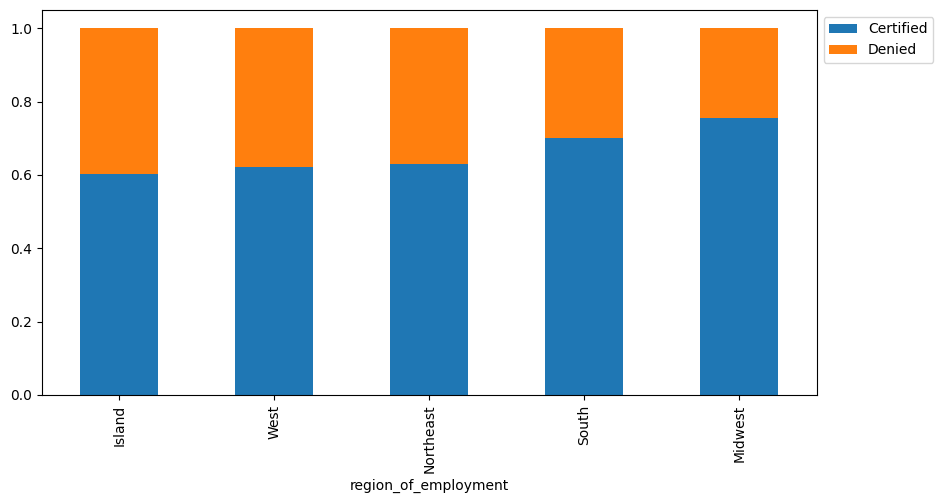

In [ ]:
stacked_barplot(df, "region_of_employment", "case_status")

In [ ]:
case_by_region_df = df.groupby(['region_of_employment','case_status']).agg(no_of_cases=('case_status','count'))
region_total = df.groupby('region_of_employment').agg(total_cases=('region_of_employment','count'))
case_by_region_df = case_by_region_df.merge(region_total, left_index=True, right_index=True).reset_index()
case_by_region_df['percentage'] = case_by_region_df['no_of_cases']/case_by_region_df['total_cases'] *100

In [ ]:
case_by_region_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,region_of_employment,case_status,no_of_cases,total_cases,percentage
2,Midwest,Certified,3253,4307,75.52821
6,South,Certified,4913,7017,70.01568
4,Northeast,Certified,4526,7195,62.90479
8,West,Certified,4100,6586,62.25326
0,Island,Certified,226,375,60.26667


In [ ]:
case_by_region_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,region_of_employment,case_status,no_of_cases,total_cases,percentage
1,Island,Denied,149,375,39.73333
9,West,Denied,2486,6586,37.74674
5,Northeast,Denied,2669,7195,37.09521
7,South,Denied,2104,7017,29.98432
3,Midwest,Denied,1054,4307,24.47179


Observations:


*   Applications with Mid-Western, Southern, and North-Eastern US as their intended region of employment have the highest percentage of certified visa statuses.
*   Applications with Island, and Western US as their intended region of employment have the lowest percentage of certified visa statuses. In other words, visa applications for these regions have a higher percentage of denied visa status.
*   Following table gives the percentages of certified visa statuses concerning the intended region of employment:

Intended Job Location |Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Mid-West | 75.53
South | 70.02
North-East | 62.90
West | 62.25
Island | 60.27


#### **prevailing_wage vs case_status**

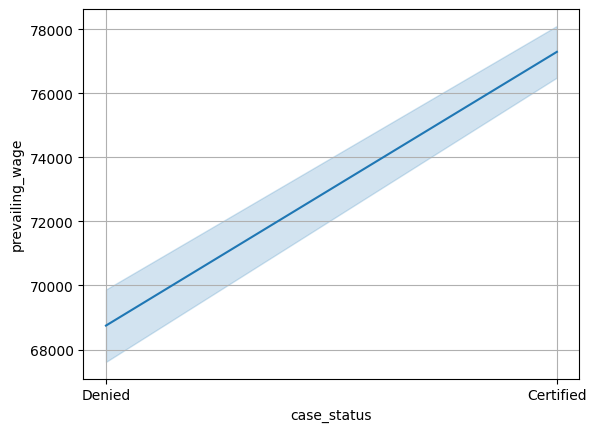

In [ ]:
sns.lineplot(data=df, y='prevailing_wage', x='case_status')
plt.grid()
plt.show()

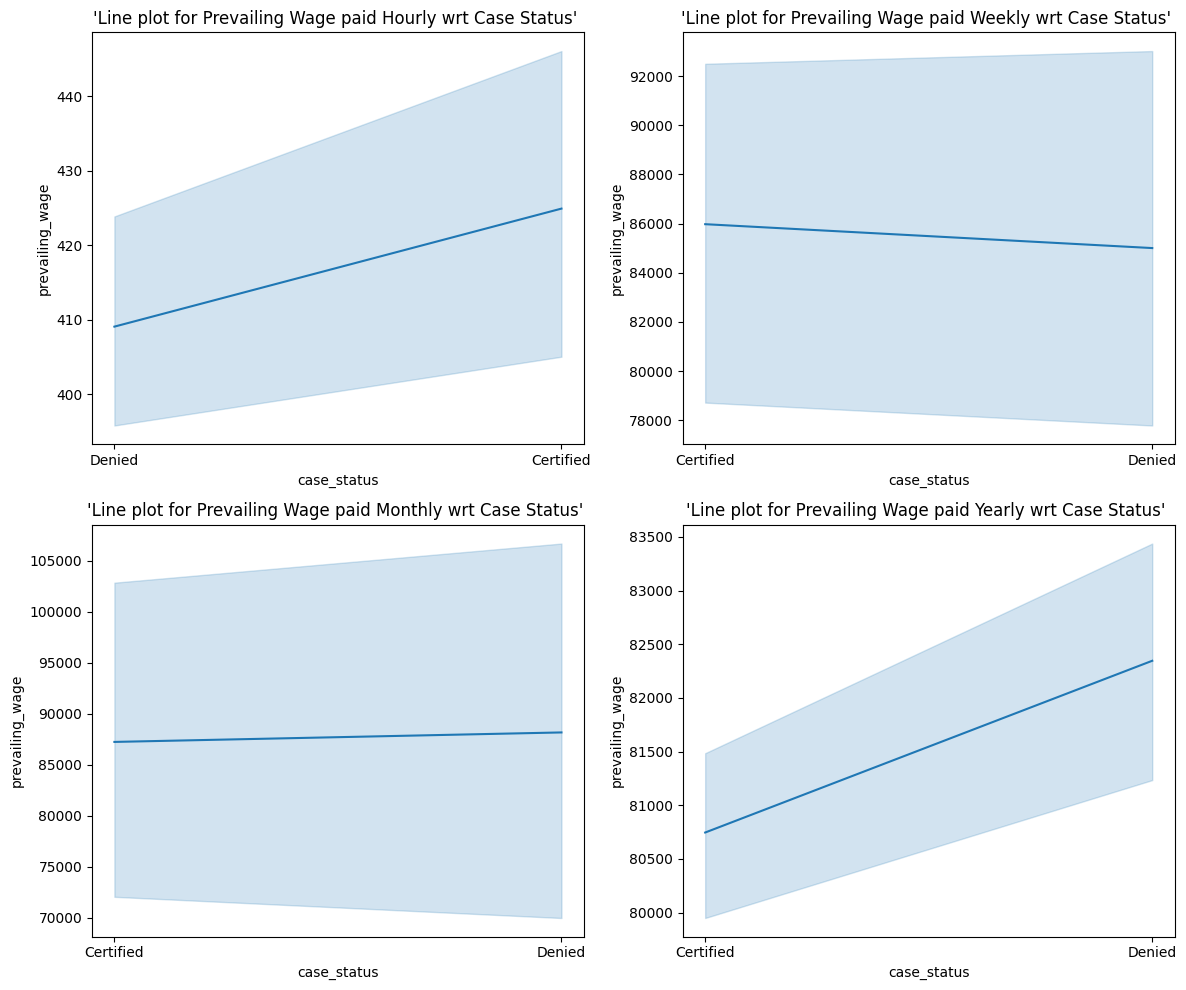

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].set_title("'Line plot for Prevailing Wage paid Hourly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Hour'], y="prevailing_wage", x="case_status", ax=axs[0, 0])
axs[0, 1].set_title("'Line plot for Prevailing Wage paid Weekly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Week'], y="prevailing_wage", x="case_status", ax=axs[0, 1])
axs[1, 0].set_title("'Line plot for Prevailing Wage paid Monthly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Month'], y="prevailing_wage", x="case_status", ax=axs[1, 0])
axs[1, 1].set_title("'Line plot for Prevailing Wage paid Yearly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Year'], y="prevailing_wage", x="case_status", ax=axs[1, 1])
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['case_status'])['prevailing_wage'].mean()

case_status
Certified   77293.61924
Denied      68748.68158
Name: prevailing_wage, dtype: float64

In [ ]:
df.groupby(['unit_of_wage','case_status'])['prevailing_wage'].mean()

unit_of_wage  case_status
Hour          Certified       424.92281
              Denied          409.08600
Month         Certified     87237.55364
              Denied        88167.63088
Week          Certified     85974.76716
              Denied        85003.10223
Year          Certified     80746.40704
              Denied        82345.84429
Name: prevailing_wage, dtype: float64

Observations:

*   Overall, the cases that have been certified have higher prevailing wages than the ones that were denied, as shown below:

Case Status | Average Prevailing Wage($)
------------|---------------------------
Certified | 77293.62
Denied | 68748.68

*   In the case of hourly and weekly wages, higher average wages seem to have a certified visa status.
*   In the case of yearly wages, lower average wages seem to have a certified visa status.
*   In the case of monthly wages, cases that have been either certified or denied seem to have similar average wage values.



#### **unit_of_wage vs case_status**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


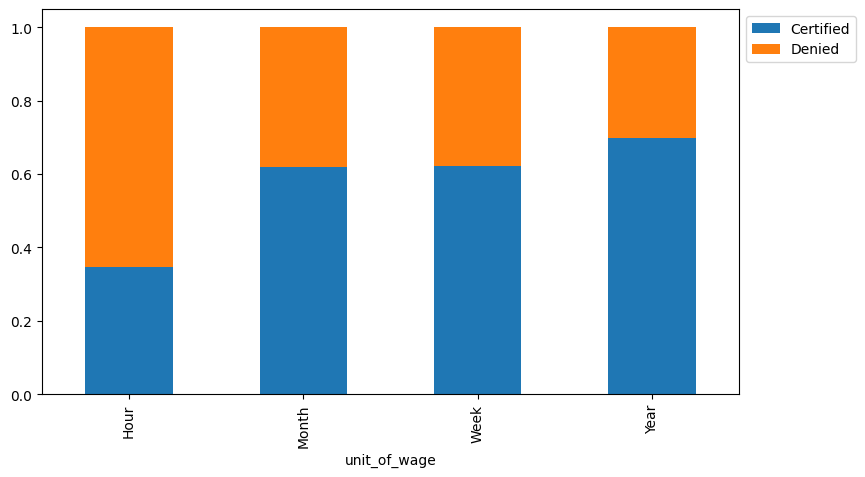

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

In [ ]:
case_by_wage_unit_df = df.groupby(['unit_of_wage','case_status']).agg(no_of_cases=('case_status','count'))
wage_unit_total = df.groupby('unit_of_wage').agg(total_cases=('unit_of_wage','count'))
case_by_wage_unit_df = case_by_wage_unit_df.merge(wage_unit_total, left_index=True, right_index=True).reset_index()
case_by_wage_unit_df['percentage'] = case_by_wage_unit_df['no_of_cases']/case_by_wage_unit_df['total_cases'] *100

In [ ]:
case_by_wage_unit_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,unit_of_wage,case_status,no_of_cases,total_cases,percentage
6,Year,Certified,16047,22962,69.88503
4,Week,Certified,169,272,62.13235
2,Month,Certified,55,89,61.79775
0,Hour,Certified,747,2157,34.63143


In [ ]:
case_by_wage_unit_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,unit_of_wage,case_status,no_of_cases,total_cases,percentage
1,Hour,Denied,1410,2157,65.36857
3,Month,Denied,34,89,38.20225
5,Week,Denied,103,272,37.86765
7,Year,Denied,6915,22962,30.11497


Observations:

*   Among the certified visa applications:
    *   Percentage of applicants who are renumerated on a yearly basis is the highest, followed by a weekly basis.
    *   Percentage of applicants who are renumerated on an hourly basis is the lowest, followed by a monthly basis.
*   Percentage of certified visa applications concerning unit of wage decreases in the order as shown below:

Unit of Wage |Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Year | 69.89
Week | 62.13
Month | 61.80
Hour | 34.63


#### **full_time_position vs case_status**

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


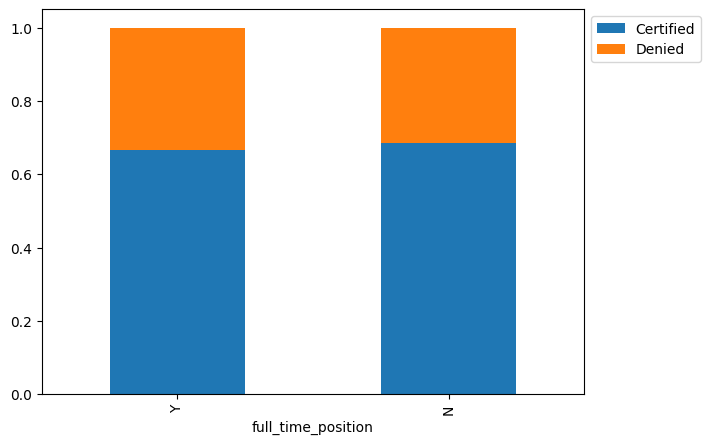

In [ ]:
stacked_barplot(data, "full_time_position", "case_status")

In [ ]:
case_by_ftp_df = df.groupby(['full_time_position','case_status']).agg(no_of_cases=('case_status','count'))
ftp_total = df.groupby('full_time_position').agg(total_cases=('full_time_position','count'))
case_by_ftp_df = case_by_ftp_df.merge(ftp_total, left_index=True, right_index=True).reset_index()
case_by_ftp_df['percentage'] = case_by_ftp_df['no_of_cases']/case_by_ftp_df['total_cases'] *100

In [ ]:
case_by_ftp_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,full_time_position,case_status,no_of_cases,total_cases,percentage
0,N,Certified,1855,2707,68.52604
2,Y,Certified,15163,22773,66.58323


In [ ]:
case_by_ftp_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,full_time_position,case_status,no_of_cases,total_cases,percentage
3,Y,Denied,7610,22773,33.41677
1,N,Denied,852,2707,31.47396


Observations:


*   Among the cases that have been certified, the percentage of cases that have full-time positions (66.58%) is very close to that which are not full-time positions (68.53).
*   Similarly,  among the cases that have been denied, the percentage of cases that have full-time positions (33.42%) is very close to that which are not full-time positions (31.47%).



### **Leading Questions**

#### **Q1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


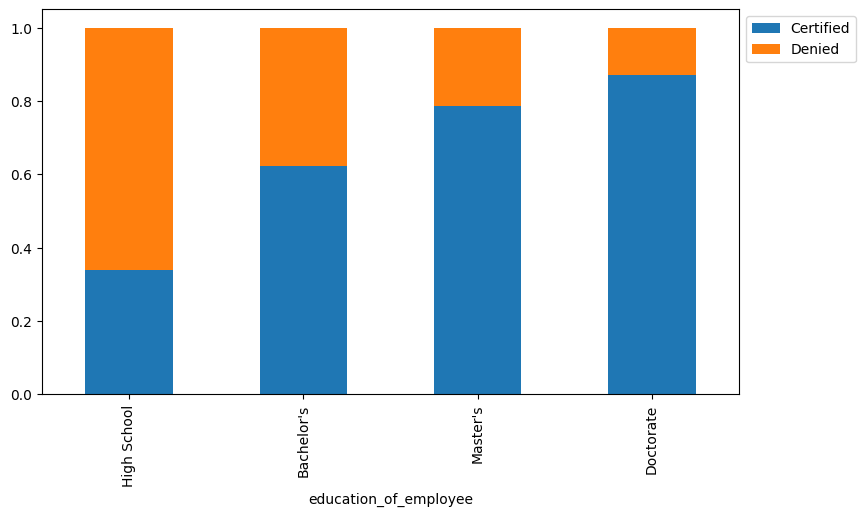

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

In [ ]:
case_by_education_df = df.groupby(['education_of_employee','case_status']).agg(no_of_cases=('case_status','count'))
education_total = df.groupby('education_of_employee').agg(total_cases=('education_of_employee','count'))
case_by_education_df = case_by_education_df.merge(education_total, left_index=True, right_index=True).reset_index()
case_by_education_df['percentage'] = case_by_education_df['no_of_cases']/case_by_education_df['total_cases'] *100

In [ ]:
case_by_education_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,education_of_employee,case_status,no_of_cases,total_cases,percentage
2,Doctorate,Certified,1912,2192,87.22628
6,Master's,Certified,7575,9634,78.62778
0,Bachelor's,Certified,6367,10234,62.21419
4,High School,Certified,1164,3420,34.03509


In [ ]:
case_by_education_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,education_of_employee,case_status,no_of_cases,total_cases,percentage
5,High School,Denied,2256,3420,65.96491
1,Bachelor's,Denied,3867,10234,37.78581
7,Master's,Denied,2059,9634,21.37222
3,Doctorate,Denied,280,2192,12.77372


Observations:

*   Applicants with a doctorate have the highest percentage of certified visa applications followed by those with a Master's degree.
*   Applicants with a High School degree have the highest percentage of denied visa applications followed by those with a Bachelor's degree. In other words, applicants with High School and Bachelor's degrees have the lowest percentage of certified visa applications.
*   Following table gives the percentages of visa applications that are certified concerning education levels:

Continent | Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Doctorate | 87.23
Master's | 78.63
Bachelor's | 62.21
High School | 34.06

*   With increase in education level of the applicant, chances of visa approval increases.

#### **Q2. How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


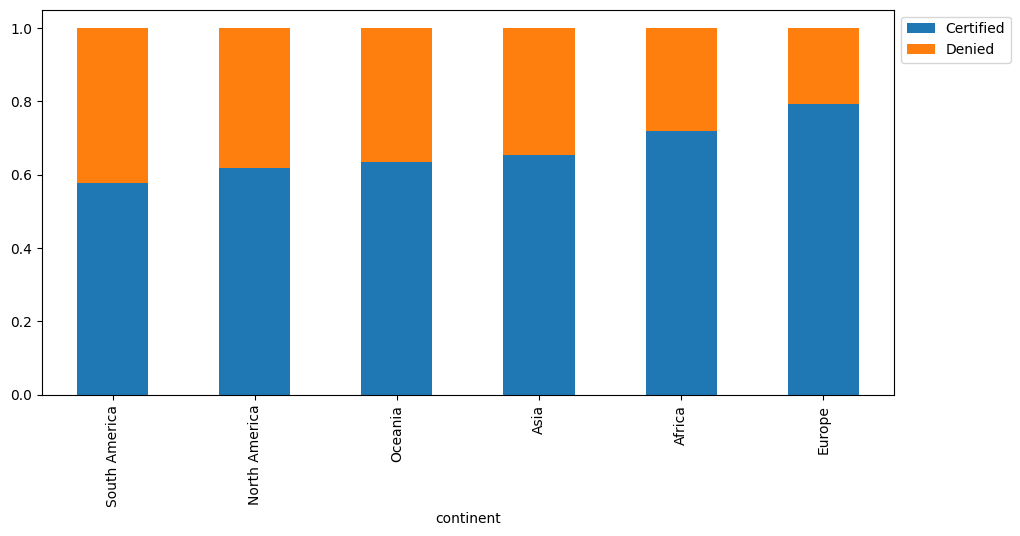

In [ ]:
stacked_barplot(df, "continent", "case_status")

In [ ]:
case_by_continents_df = df.groupby(['continent','case_status']).agg(no_of_cases=('case_status','count'))
continents_total = df.groupby('continent').agg(total_cases=('continent','count'))
case_by_continents_df = case_by_continents_df.merge(continents_total, left_index=True, right_index=True).reset_index()
case_by_continents_df['percentage'] = case_by_continents_df['no_of_cases']/case_by_continents_df['total_cases'] *100

In [ ]:
case_by_continents_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,continent,case_status,no_of_cases,total_cases,percentage
4,Europe,Certified,2957,3732,79.23365
0,Africa,Certified,397,551,72.05082
2,Asia,Certified,11012,16861,65.31048
8,Oceania,Certified,122,192,63.54167
6,North America,Certified,2037,3292,61.87728
10,South America,Certified,493,852,57.86385


In [ ]:
case_by_continents_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,continent,case_status,no_of_cases,total_cases,percentage
11,South America,Denied,359,852,42.13615
7,North America,Denied,1255,3292,38.12272
9,Oceania,Denied,70,192,36.45833
3,Asia,Denied,5849,16861,34.68952
1,Africa,Denied,154,551,27.94918
5,Europe,Denied,775,3732,20.76635


Observations:

*   Europe has the highest percentage of certified visa applications followed by Africa and Asia.
*   South America has the highest percentage of denied visa applications followed by North America and Oceania. In other words, South America, North America, and Oceania have the lowest percentage of certified visa applications.
*   Following table gives the continents with the highest percentages of visa applications that are certified:

Continent | Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Europe | 79.23
Africa | 72.05
Asia | 65.31

*   Following table gives the continents with highest percentages of visa applications that are denied:

Continent | Percentage of Denied Visa Applications (%)
----------|------------------------------------------
South America | 42.14
North America | 38.12
Oceania | 36.46

#### **Q3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


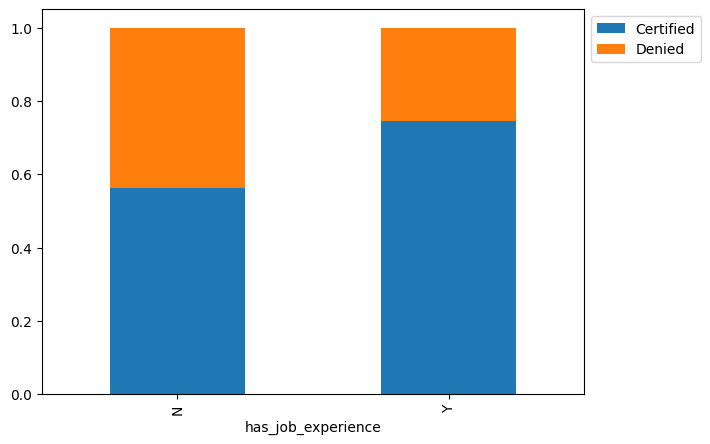

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")

In [ ]:
case_by_job_exp_df = df.groupby(['has_job_experience','case_status']).agg(no_of_cases=('case_status','count'))
job_exp_total = df.groupby('has_job_experience').agg(total_cases=('has_job_experience','count'))
case_by_job_exp_df = case_by_job_exp_df.merge(job_exp_total, left_index=True, right_index=True).reset_index()
case_by_job_exp_df['percentage'] = case_by_job_exp_df['no_of_cases']/case_by_job_exp_df['total_cases'] *100

In [ ]:
case_by_job_exp_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,has_job_experience,case_status,no_of_cases,total_cases,percentage
2,Y,Certified,11024,14802,74.47642
0,N,Certified,5994,10678,56.13411


In [ ]:
case_by_job_exp_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,has_job_experience,case_status,no_of_cases,total_cases,percentage
1,N,Denied,4684,10678,43.86589
3,Y,Denied,3778,14802,25.52358


Observations:

*   Applicants with prior job experience have the highest percentage of certified visa applications (ie, 74.48%).
*    Applicants without prior job experience have a higher percentage of denied visa applications (ie, 43.57%) as compared to those with prior job experience (ie, 25.52%).
*    Applicants without prior job experience have a lower percentage of certified visa applications (ie, 56.13%) as compared to those with prior job experience (ie, 74.48%).
*   Following table gives the percentages of visa statuses concerning prior job experience:

Prior Job Experience | Visa Status |Percentage of Visa Applications (%)
----------|------------|------------------------------------------
Yes | Certified | 74.48
No | Certified | 56.14
Yes | Denied | 25.52
No | Denied | 43.87

*   Appplicants with prior job experience have higher chances of visa certification.


#### **Q4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


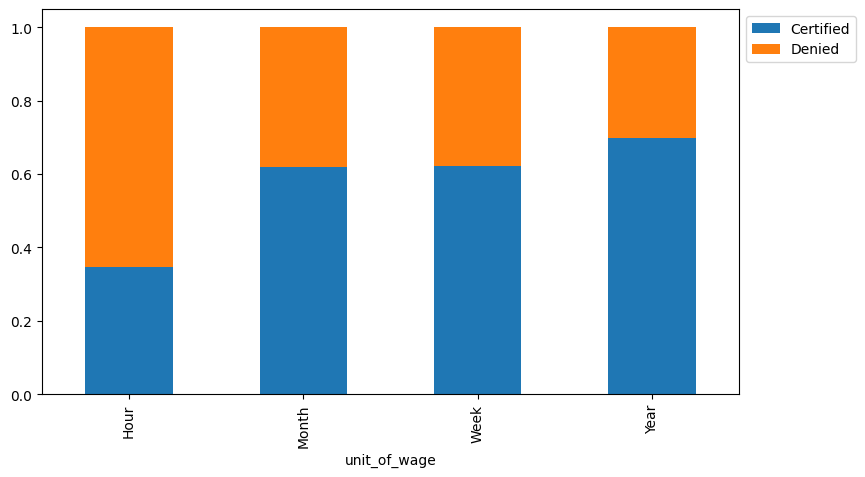

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

In [ ]:
case_by_wage_unit_df = df.groupby(['unit_of_wage','case_status']).agg(no_of_cases=('case_status','count'))
wage_unit_total = df.groupby('unit_of_wage').agg(total_cases=('unit_of_wage','count'))
case_by_wage_unit_df = case_by_wage_unit_df.merge(wage_unit_total, left_index=True, right_index=True).reset_index()
case_by_wage_unit_df['percentage'] = case_by_wage_unit_df['no_of_cases']/case_by_wage_unit_df['total_cases'] *100

In [ ]:
case_by_wage_unit_df.query('case_status=="Certified"').sort_values(by='percentage', ascending=False)

,unit_of_wage,case_status,no_of_cases,total_cases,percentage
6,Year,Certified,16047,22962,69.88503
4,Week,Certified,169,272,62.13235
2,Month,Certified,55,89,61.79775
0,Hour,Certified,747,2157,34.63143


In [ ]:
case_by_wage_unit_df.query('case_status=="Denied"').sort_values(by='percentage', ascending=False)

,unit_of_wage,case_status,no_of_cases,total_cases,percentage
1,Hour,Denied,1410,2157,65.36857
3,Month,Denied,34,89,38.20225
5,Week,Denied,103,272,37.86765
7,Year,Denied,6915,22962,30.11497


Observations:

*   Among the certified visa applications:
    *   Percentage of applicants who are renumerated on a yearly basis is the highest, followed by a weekly basis.
    *   Percentage of applicants who are renumerated on an hourly basis is the lowest, followed by a monthly basis.
*   Percentage of certified visa applications concerning unit of wage decreases in the order as shown below:

Unit of Wage |Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Year | 68.89
Week | 62.13
Month | 61.80
Hour | 34.63

*   Chances of visa certification are highest when the unit of wages is yearly.

#### **Q5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

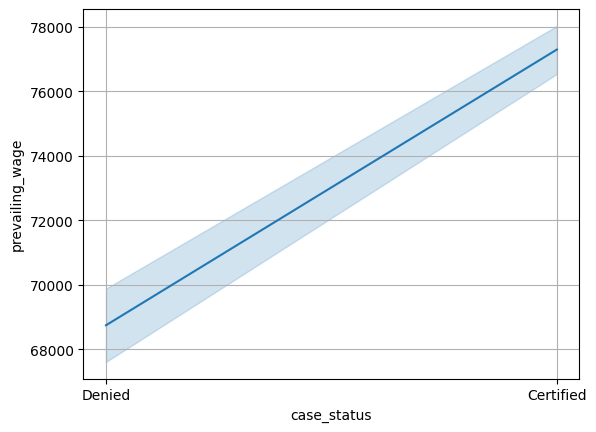

In [ ]:
sns.lineplot(data=df, y='prevailing_wage', x='case_status')
plt.grid()
plt.show()

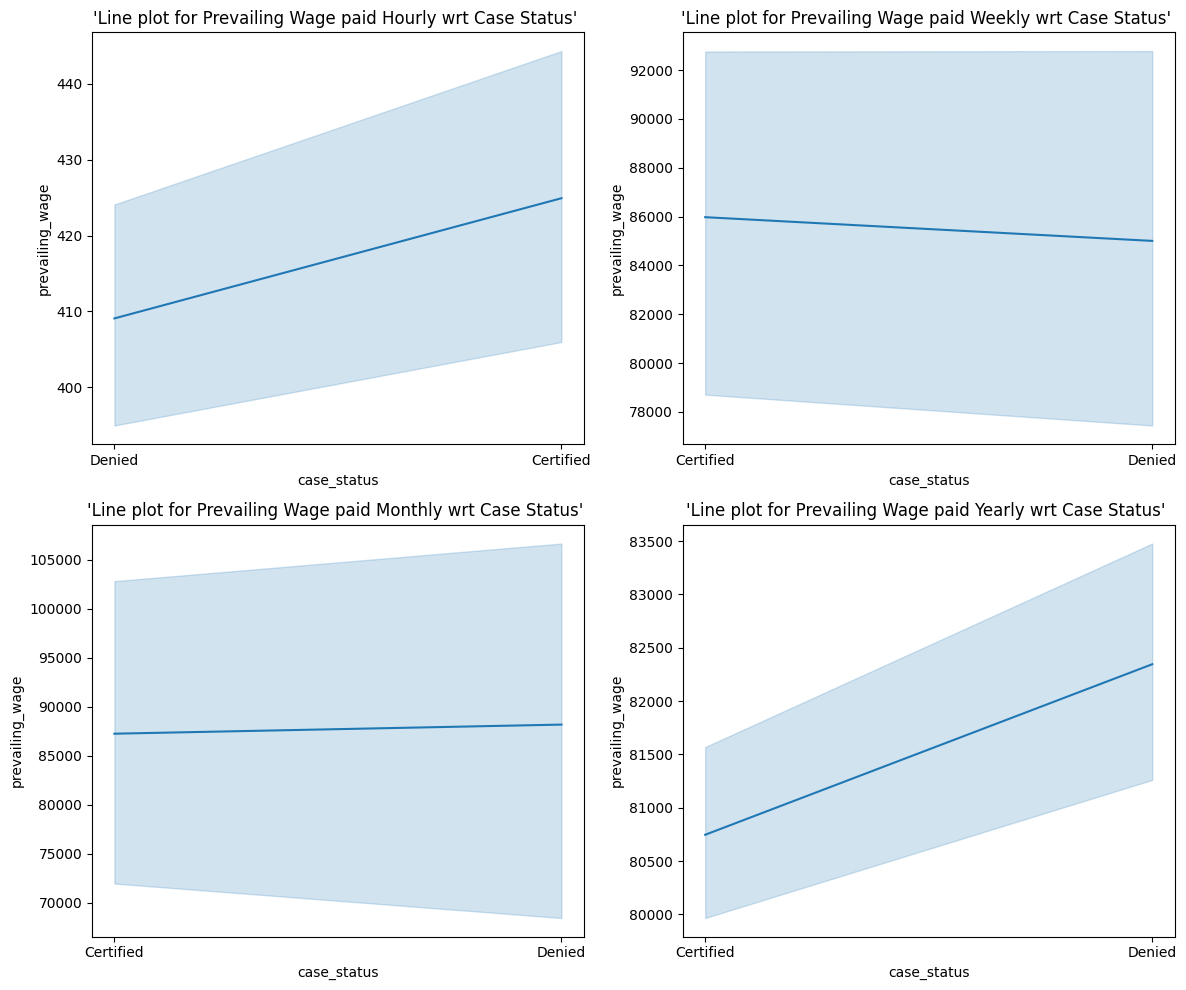

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].set_title("'Line plot for Prevailing Wage paid Hourly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Hour'], y="prevailing_wage", x="case_status", ax=axs[0, 0])
axs[0, 1].set_title("'Line plot for Prevailing Wage paid Weekly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Week'], y="prevailing_wage", x="case_status", ax=axs[0, 1])
axs[1, 0].set_title("'Line plot for Prevailing Wage paid Monthly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Month'], y="prevailing_wage", x="case_status", ax=axs[1, 0])
axs[1, 1].set_title("'Line plot for Prevailing Wage paid Yearly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Year'], y="prevailing_wage", x="case_status", ax=axs[1, 1])
plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['case_status'])['prevailing_wage'].mean()

case_status
Certified   77293.61924
Denied      68748.68158
Name: prevailing_wage, dtype: float64

In [ ]:
df.groupby(['unit_of_wage','case_status'])['prevailing_wage'].mean()

unit_of_wage  case_status
Hour          Certified       424.92281
              Denied          409.08600
Month         Certified     87237.55364
              Denied        88167.63088
Week          Certified     85974.76716
              Denied        85003.10223
Year          Certified     80746.40704
              Denied        82345.84429
Name: prevailing_wage, dtype: float64

Observations:

*   Overall, the cases that have been certified have higher prevailing wages than the ones that were denied, as shown below:

Case Status | Average Prevailing Wage($)
------------|---------------------------
Certified | 77293.62
Denied | 68748.68

*   In the case of hourly and weekly wages, higher average wages seem to have a certified visa status.
*   In the case of yearly wages, lower average wages seem to have a certified visa status.
*   In the case of monthly wages, cases that have been either certified or denied seem to have similar average wage values.

## **Data preprocessing**



### **Feature Engineering**

Since the data is from the year 2016, we calculate the company's age as yr_since_estab.

yr_since_estab = 2016 - yr_of_estab


In [ ]:
df['yr_since_estab'] = 2016 - df['yr_of_estab']

In [ ]:
# Dropping the column 'yr_of_estab' as we will use 'yr_since_estab' for further analysis:
df.drop('yr_of_estab',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   case_status            25480 non-null  object 
 10  yr_since_estab         25480 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


### **Outlier Treatment**

['no_of_employees', 'prevailing_wage', 'yr_since_estab']


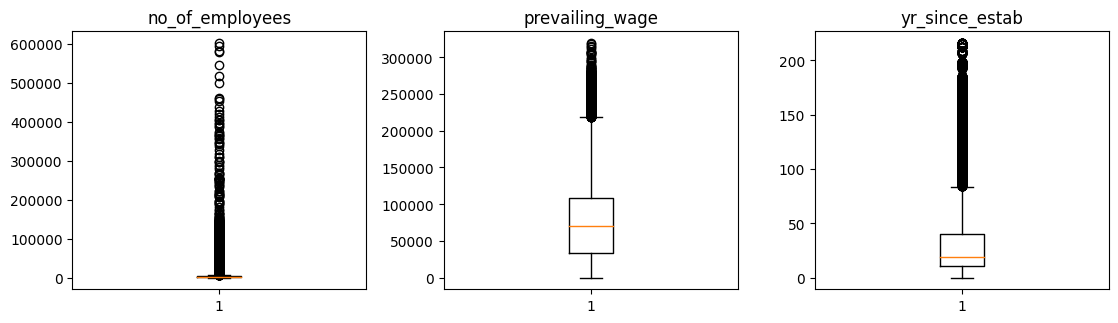

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_columns)


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:

*   There are quite a few outliers in the data. We will not treat them as they are proper values.




## **Exploratory Data Analysis (EDA)**
To check if performing feature engineering has resulted in any major changes to the dataset.

### **Statistical Summary of the data**

In [ ]:
# Statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.08921,22877.91745,11.00000,1022.00000,2109.00000,3504.00000,602069.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000
yr_since_estab,25480.00000,36.59007,42.36693,0.00000,11.00000,19.00000,40.00000,216.00000


In [ ]:
# Statistical summary of the dataset for 'object' columns:
df.describe(include='object').T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Observations:

*   Since we changed the negative values for column no_of_employees using the absolute function, the minimum number of employees in the data has changed from -26 to 11.
*   Since we have created a new column that gives us the age of the company, ie yr_since_estab, we have this column instead of yr_of_estab in the dataset.
*   Average age of a company in the dataset is 36.59 years.
*   Minimum age of a company is 0 years while the maximum age is 216 years.



### **Univariate Analysis**

#### **prevailing_wage**

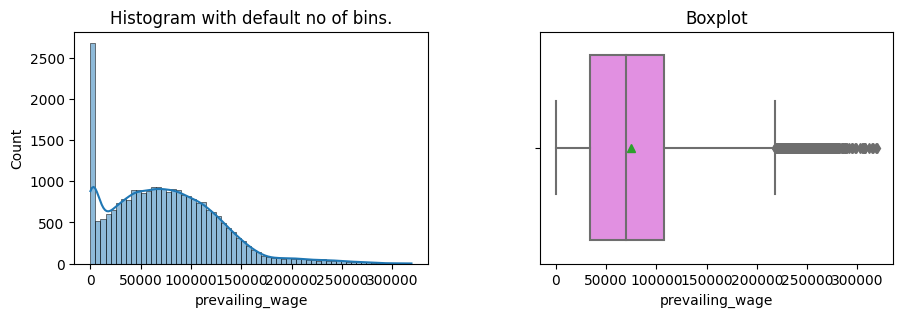

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'prevailing_wage':
creating_hist_box(df, 'prevailing_wage')

In [ ]:
df['prevailing_wage'].describe()

count    25480.00000
mean     74455.81459
std      52815.94233
min          2.13670
25%      34015.48000
50%      70308.21000
75%     107735.51250
max     319210.27000
Name: prevailing_wage, dtype: float64

Observations:

*   No major changes have occurred due to feature engineering.




#### **no_of_employees**

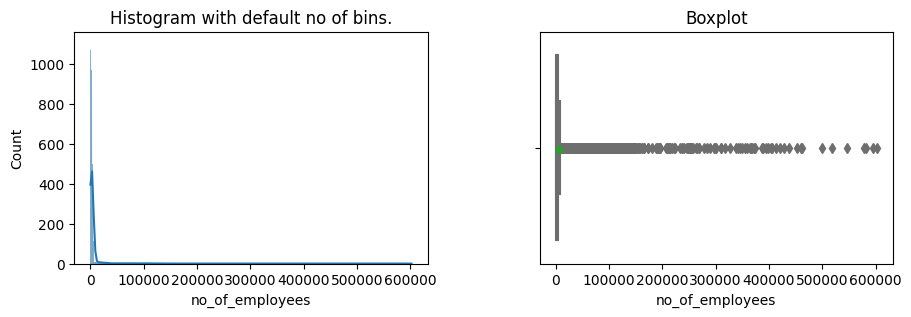

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'no_of_employees':
creating_hist_box(df, 'no_of_employees')

Observations:

*   No major changes have occurred due to feature engineering.



#### **continent**

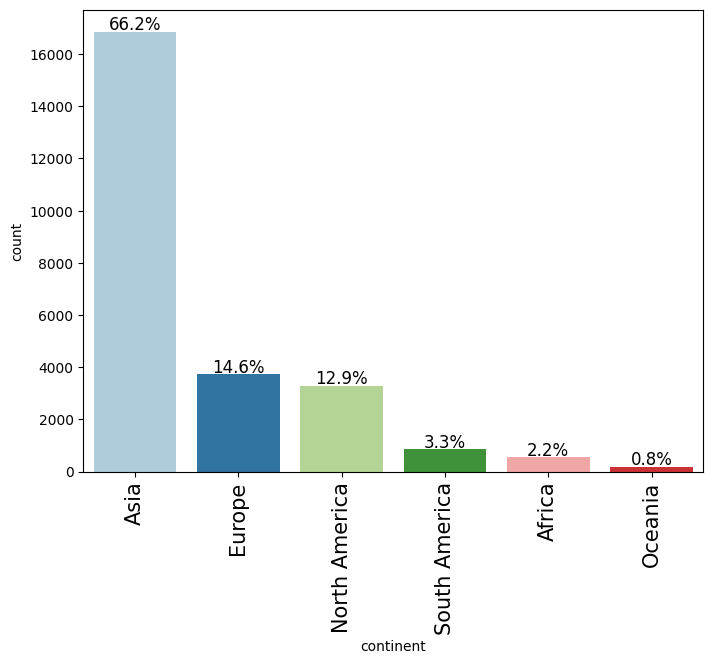

In [ ]:
# Barplot for the cloumn 'continent' in the dataset:
labeled_barplot(df, 'continent', perc=True, rotatn=90)

Observations:

*   No major changes have occurred due to feature engineering.

#### **education_of_employee**

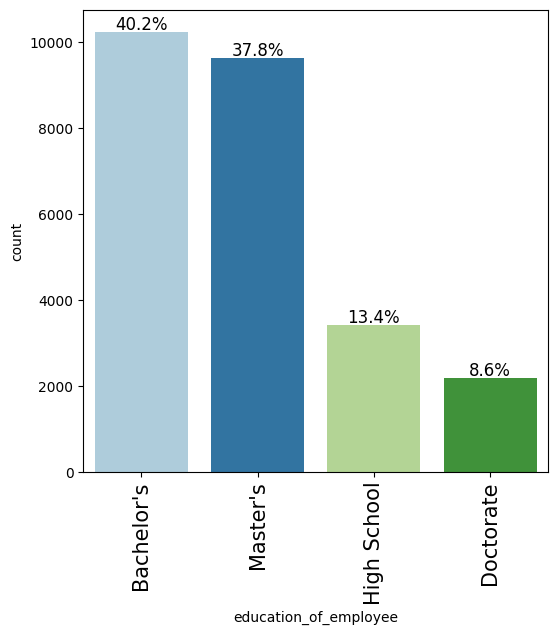

In [ ]:
# Barplot for the cloumn 'education_of_employee' in the dataset:
labeled_barplot(df, 'education_of_employee', perc=True, rotatn=90)

Observations:

*   No major changes have occurred due to feature engineering.

#### **has_job_experience**

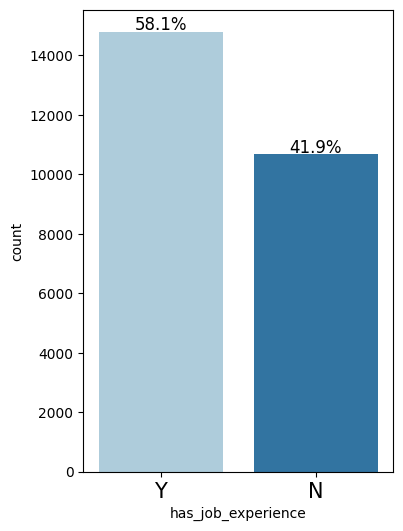

In [ ]:
# Barplot for the cloumn 'has_job_experience' in the dataset:
labeled_barplot(df, 'has_job_experience', perc=True)

Observations:

*   No major changes have occurred due to feature engineering.

#### **region_of_employment**

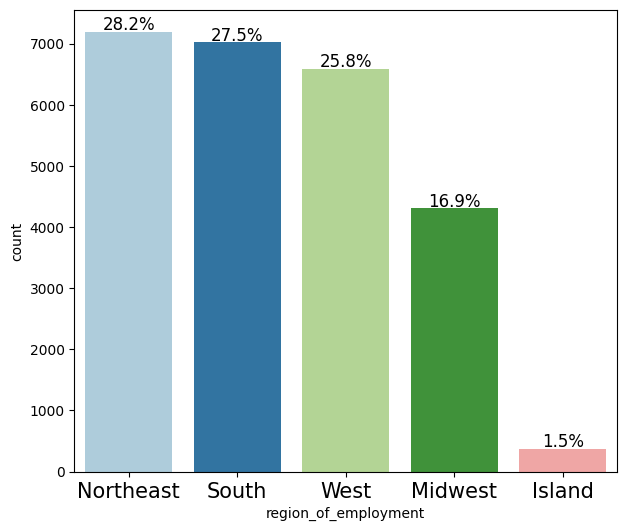

In [ ]:
# Barplot for the cloumn 'region_of_employment' in the dataset:
labeled_barplot(df, 'region_of_employment', perc=True)

Observations:

*   No major changes have occurred due to feature engineering.

#### **case_status**

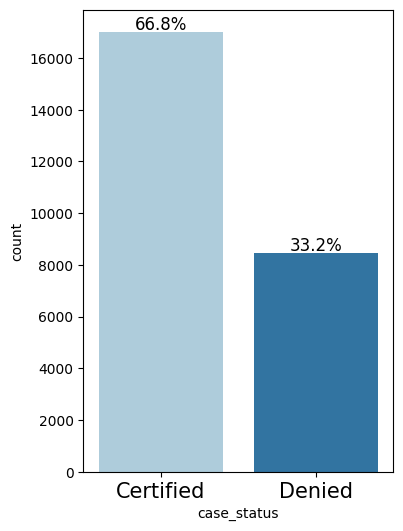

In [ ]:
# Barplot for the cloumn 'case_status' in the dataset:
labeled_barplot(df, 'case_status', perc=True)

Observations:

*   No major changes have occurred due to feature engineering.

#### **full_time_position**

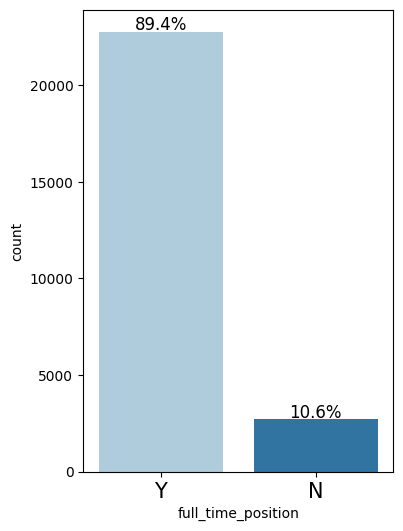

In [ ]:
# Barplot for the cloumn 'full_time_position' in the dataset:
labeled_barplot(df, 'full_time_position', perc=True)

Observations:

*   No major changes have occurred due to feature engineering.

#### **yr_since_estab**

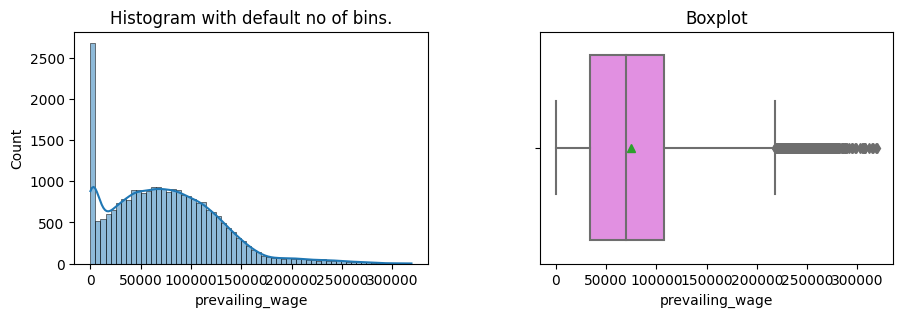

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'yr_since_estab':
creating_hist_box(df, 'prevailing_wage')

In [ ]:
df['yr_since_estab'].describe()

count   25480.00000
mean       36.59007
std        42.36693
min         0.00000
25%        11.00000
50%        19.00000
75%        40.00000
max       216.00000
Name: yr_since_estab, dtype: float64

Observations:

*   This column represents the age of a company.
*   The distribution for the column is right-skewed.
*   On average, a company is 36.59 years old, while the median age is 19 years.
*   There are outliers on the higher end of the distribution for 'yr_since_estab'.





### **Multivariate Analysis**

#### **Correlation between the variables**

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

df_corr = df[cols_list].corr()
df_corr

,no_of_employees,prevailing_wage,yr_since_estab
no_of_employees,1.00000,-0.00952,0.01777
prevailing_wage,-0.00952,1.00000,-0.01234
yr_since_estab,0.01777,-0.01234,1.00000


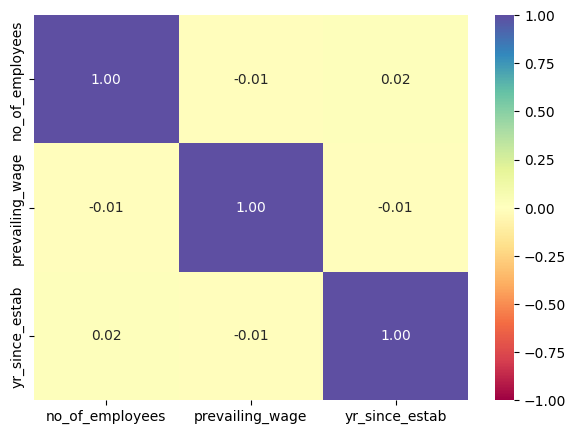

In [ ]:
#Heatmap showing correlation values between different variables.
plt.figure(figsize=(7, 5))
sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations:

*   Following are the slight changes in the correlation values before and after imputation:

Variables| Corr. Value before Feature Engineering | Corr. Value After Engineering
---------|----------------------------------------|--------------
prevailing_wage & yr_of_estab | 0.01 | N/A
no_of_employees & yr_of_estab | -0.02 | N/A
no_of_employees & yr_since_estab | N/A | 0.02
prevailing_wage & yr_since_estab | N/A | -0.01

*   No other major changes have been observed.



#### **region_of_employment vs education_of_employee**

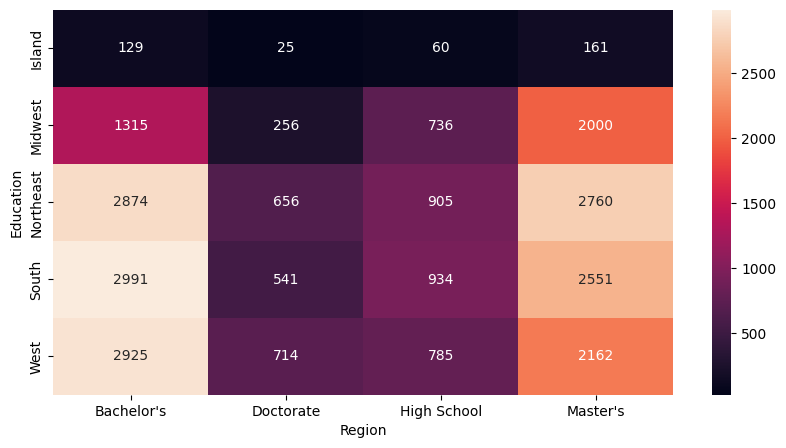

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['region_of_employment'],df['education_of_employee']),
    annot=True,
    fmt="g",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

Observations:

*   The plot suggests that there are no major changes after feature engineering.



#### **has_job_experience vs requires_job_training**


requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


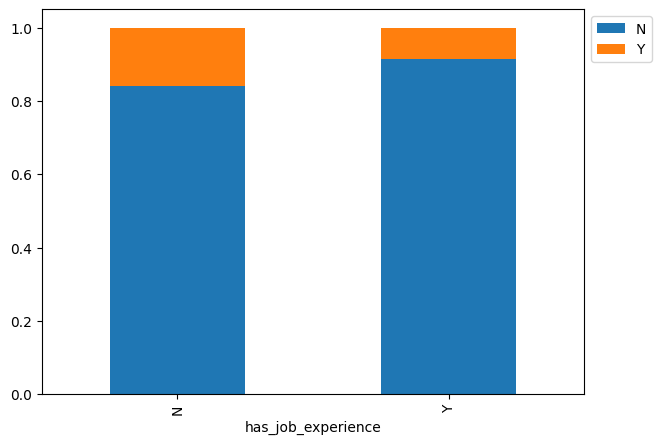

In [ ]:
stacked_barplot(df, "has_job_experience", "requires_job_training")

Observations:

*   The plot suggests that there are no major changes after feature engineering.

#### **region_of_employment vs case_status**

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


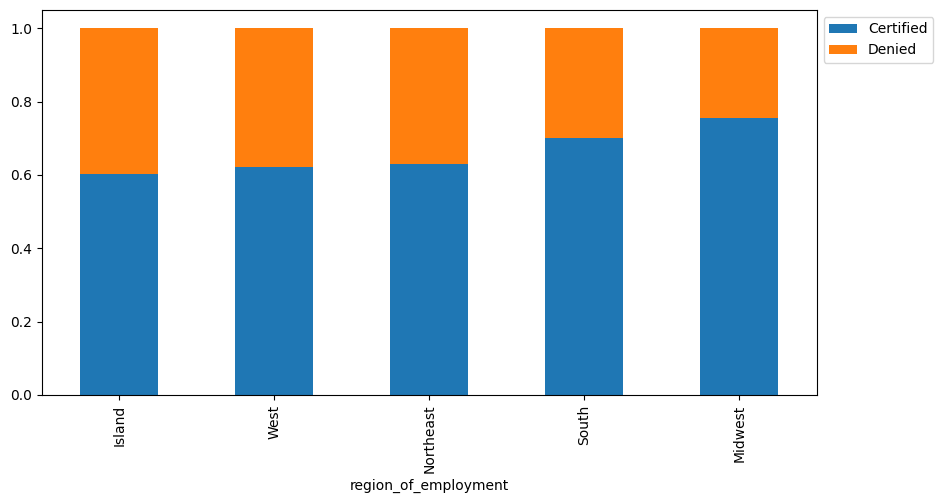

In [ ]:
stacked_barplot(df, "region_of_employment", "case_status")

Observations:

*   The plot suggests that there are no major changes after feature engineering.

#### **requires_job_training vs case_status**

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


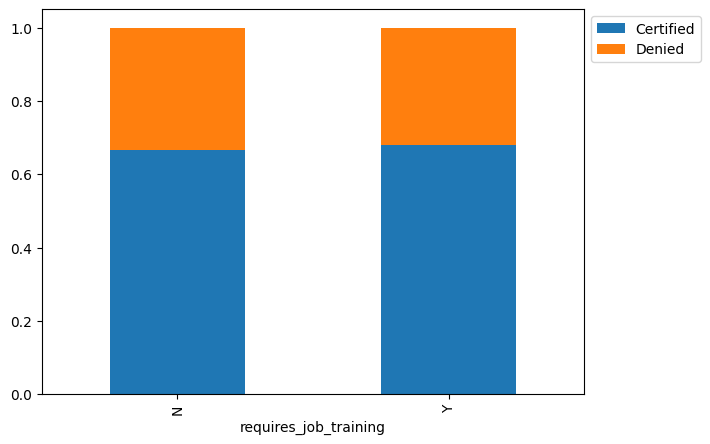

In [ ]:
stacked_barplot(df, "requires_job_training", "case_status")

Observations:

*   The plot suggests that there are no major changes after feature engineering.

#### **prevailing_wage vs region_of_employment**

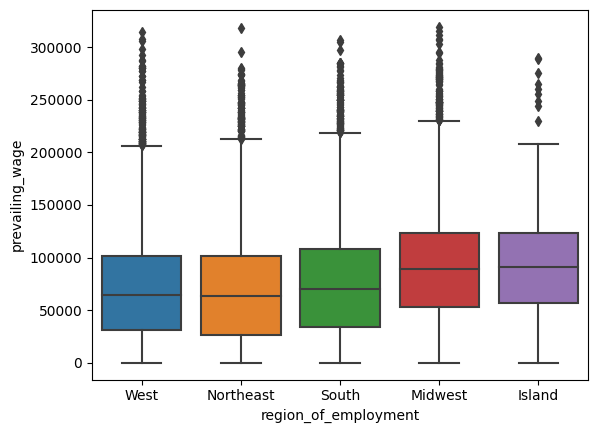

In [ ]:
sns.boxplot(data=df, x='region_of_employment', y='prevailing_wage')
plt.show()

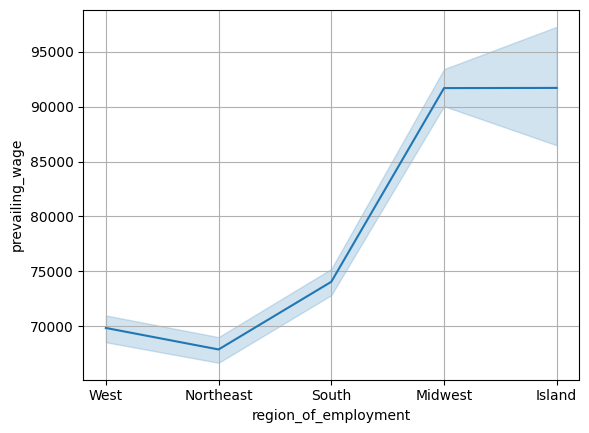

In [ ]:
sns.lineplot(data=df, x='region_of_employment', y='prevailing_wage')
plt.grid()
plt.show()

In [ ]:
df.groupby(['region_of_employment'])['prevailing_wage'].mean().sort_values(ascending=False)

region_of_employment
Island      91712.75076
Midwest     91696.74179
South       74040.54522
West        69832.62870
Northeast   67872.66282
Name: prevailing_wage, dtype: float64

Observations:

*   The average value of prevailing wage is highest in the Island region, followed by Mid-Western and Southern US.
*    The average value of prevailing wage is lowest in the Northeast region, followed by Western US.
*   There are outliers in the upper end of the distribution for all the regions.
*   Below table shows the decreasing average prevailing wages concerning region_of employment:

Region of Employment | Average Prevailing Wage ($)
---------------------|----------------------------
Island | 91712.75
Mid-West | 91696.74
South | 74040.55
West | 69832.63
North-East | 67872.66282






#### **full_time_position vs case_status**

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


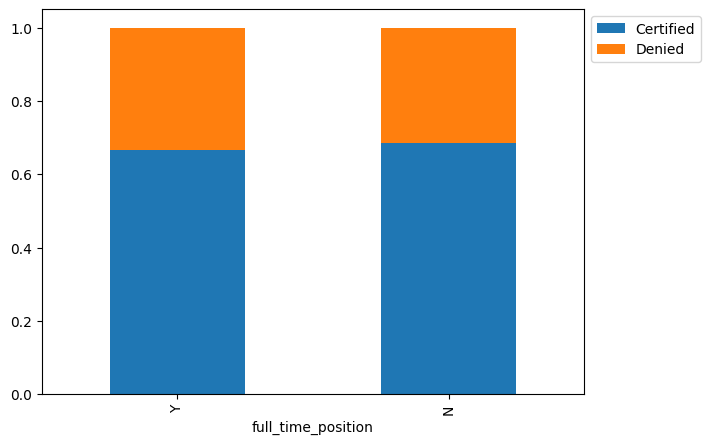

In [ ]:
stacked_barplot(data, "full_time_position", "case_status")

Observations:

*   The plot suggests that there are no major changes after feature engineering.

#### **education_of_employee vs prevailing_wage**

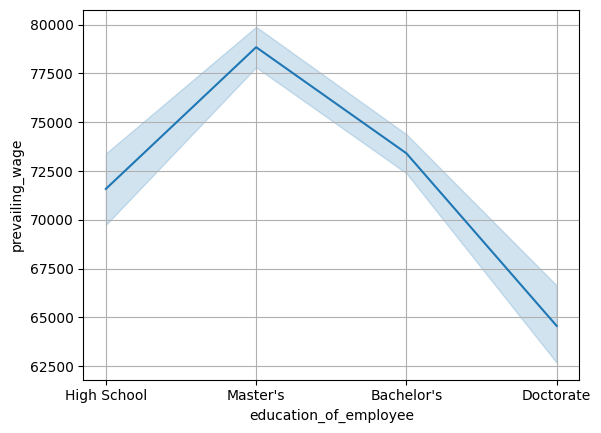

In [ ]:
sns.lineplot(data=df, x='education_of_employee', y='prevailing_wage')
plt.grid()
plt.show()

In [ ]:
df.groupby('education_of_employee')['prevailing_wage'].mean().sort_values(ascending=False)

education_of_employee
Master's      78843.05784
Bachelor's    73405.44374
High School   71582.14776
Doctorate     64561.07666
Name: prevailing_wage, dtype: float64

Observation:

*   Applicants with Master's degrees are offered the highest wages, followed by those who have Bachelor's degrees.
*   Applicants with Doctorate are offered the lowest wages, followed by those who have a High School degree.



#### **has_job_experience vs prevailing_wage**

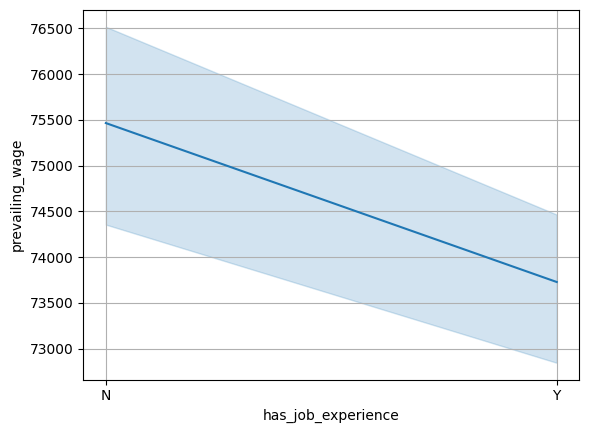

In [ ]:
sns.lineplot(data=df, x='has_job_experience', y='prevailing_wage')
plt.grid()
plt.show()

In [ ]:
df.groupby('has_job_experience')['prevailing_wage'].mean().sort_values(ascending=False)

has_job_experience
N   75464.15992
Y   73728.40536
Name: prevailing_wage, dtype: float64

Observations:

*   Applicants without job experience have a higher average prevailing wage as compared to applicants with prior job experience.




#### **requires_job_training vs prevailing_wage**

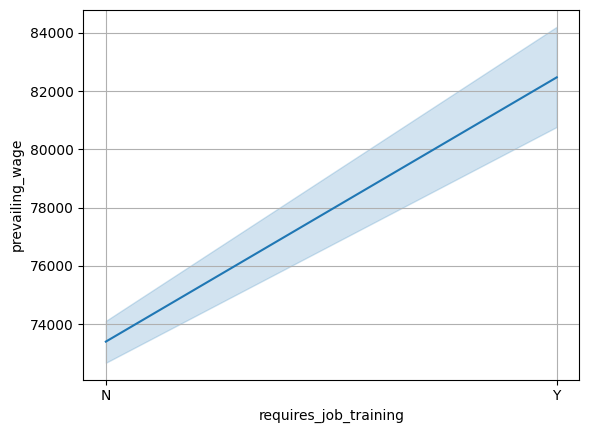

In [ ]:
sns.lineplot(data=df, x='requires_job_training', y='prevailing_wage')
plt.grid()
plt.show()

In [ ]:
df.groupby('requires_job_training')['prevailing_wage'].mean().sort_values(ascending=False)

requires_job_training
Y   82467.72027
N   73404.75216
Name: prevailing_wage, dtype: float64

Observations:

*   Applicants who do not require job training have a lower average prevailing wage as compared to applicants who require job training.

#### **region_of_employment vs prevailing_wage**

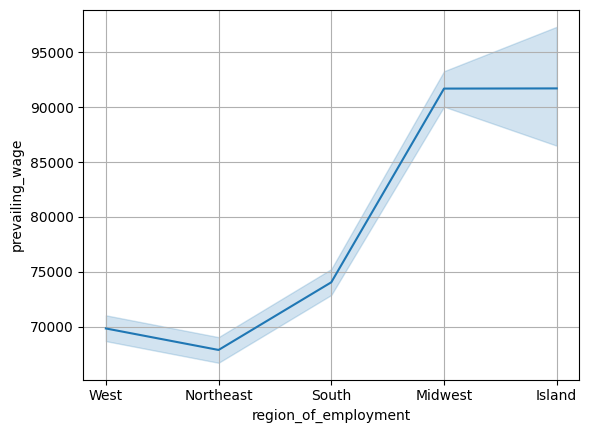

In [ ]:
sns.lineplot(data=df, x='region_of_employment', y='prevailing_wage')
plt.grid()
plt.show()

In [ ]:
df.groupby('region_of_employment')['prevailing_wage'].mean().sort_values(ascending=False)

region_of_employment
Island      91712.75076
Midwest     91696.74179
South       74040.54522
West        69832.62870
Northeast   67872.66282
Name: prevailing_wage, dtype: float64

Observations:

*   Jobs in the Island region of US have the highest average prevailing wage , while North-East has the lowest average prevailing wage.
*   Below table shows the average prevailing wage concerning different regions of employment:

Region of Employment | Average Yearly Prevailing Wage ($)
---------------------|----------------------------------
Island | 91712.75
Mid-West | 91696.74
South | 74040.55
West | 69832.63
North-East | 67872.66


### **Leading Questions**

#### **Q1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


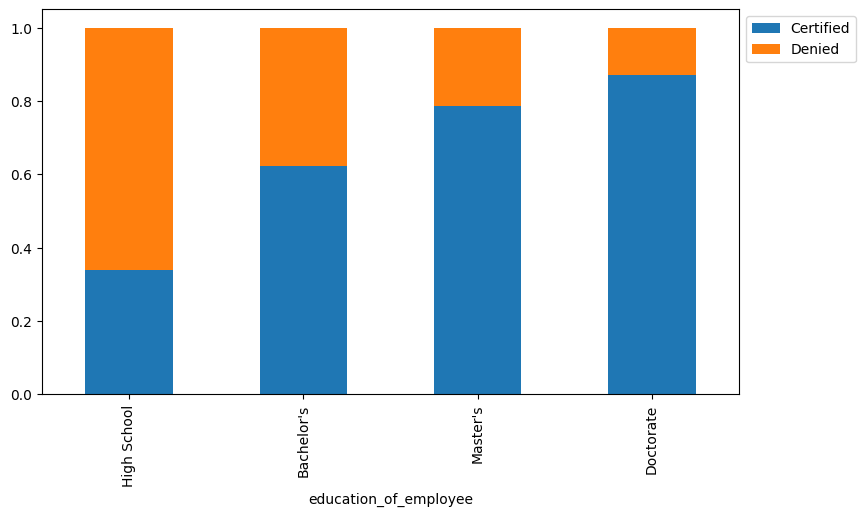

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

Observations:

*   The plot suggests that there are no major changes after feature engineering.




#### **Q2. How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


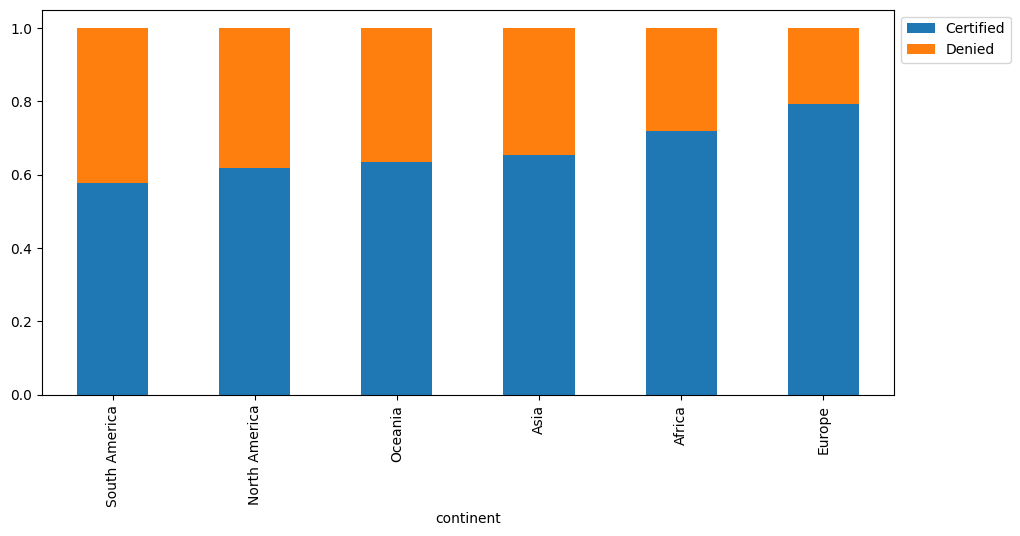

In [ ]:
stacked_barplot(df, "continent", "case_status")

Observations:

*   The plot suggests that there are no major changes after feature engineering.

#### **Q3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


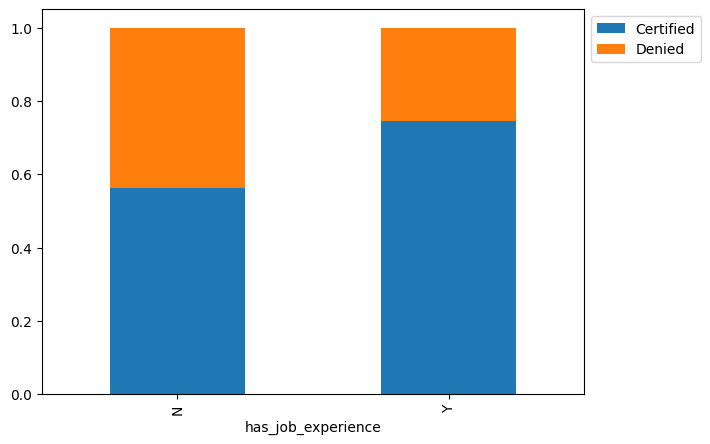

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")

Observations:

*   The plot suggests that there are no major changes after feature engineering.

#### **Q4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


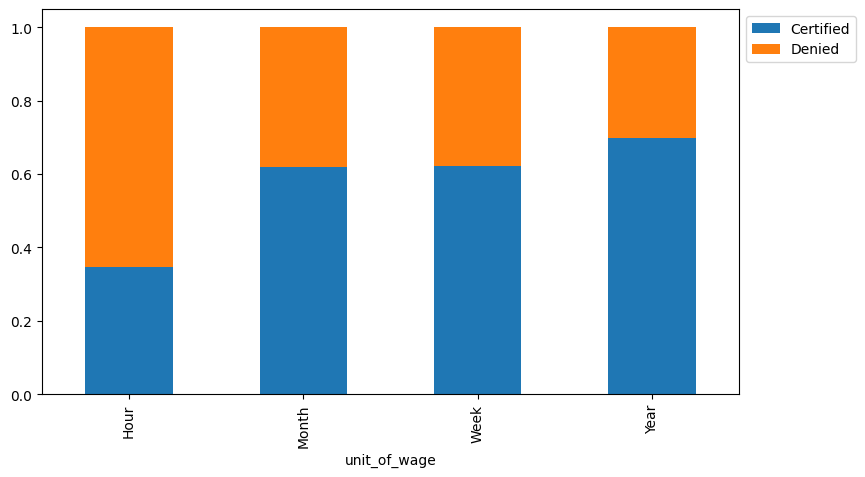

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")

Observations:

*   The plot suggests that there are no major changes after feature engineering.

#### **Q5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

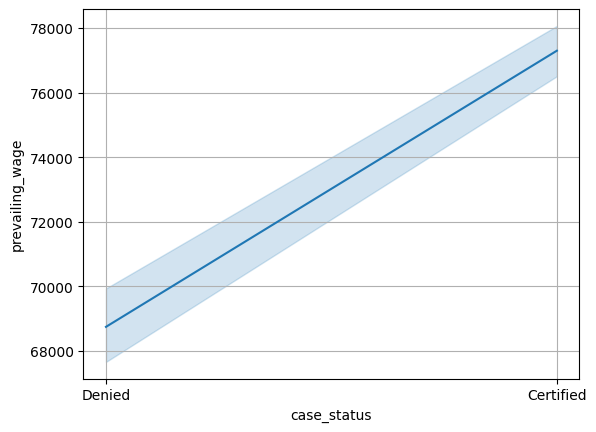

In [ ]:
sns.lineplot(data=df, y='prevailing_wage', x='case_status')
plt.grid()
plt.show()

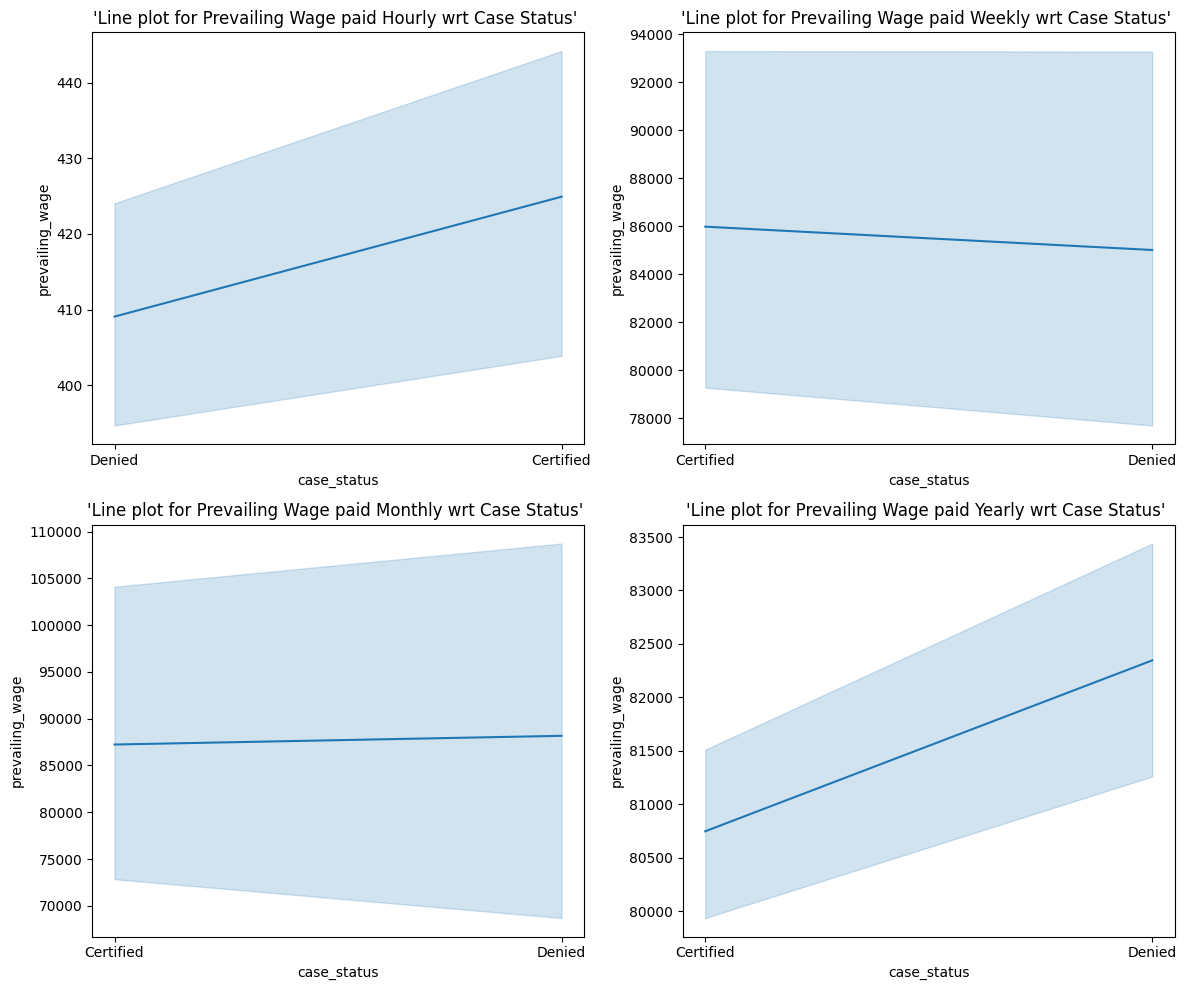

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].set_title("'Line plot for Prevailing Wage paid Hourly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Hour'], y="prevailing_wage", x="case_status", ax=axs[0, 0])
axs[0, 1].set_title("'Line plot for Prevailing Wage paid Weekly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Week'], y="prevailing_wage", x="case_status", ax=axs[0, 1])
axs[1, 0].set_title("'Line plot for Prevailing Wage paid Monthly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Month'], y="prevailing_wage", x="case_status", ax=axs[1, 0])
axs[1, 1].set_title("'Line plot for Prevailing Wage paid Yearly wrt Case Status' ")
sns.lineplot(data=df.loc[df['unit_of_wage']=='Year'], y="prevailing_wage", x="case_status", ax=axs[1, 1])
plt.tight_layout()
plt.show()

Observations:

*   The plot suggests that there are no major changes after feature engineering.



## **Model evaluation criterion**

### Model can make correct predictions as:

1. True Positive: The model predicts that the visa application will get certified and in reality, the visa application should get certified.
2. True Negative: The model predicts that the visa application will get denied and in reality, the visa application should get denied.

### Model can make wrong predictions as:

1. False Positive: The model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. False Negative: The model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both cases are important as:

* If a visa is certified when it had to be denied, a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified, the U.S. will lose a suitable human resource that can contribute to the economy.


### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher the chances of minimizing False Negatives and False Positives.

## **Data preparation for modeling**


In [ ]:
# Replace Structure:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
df["has_job_experience"] = df["has_job_experience"].apply(lambda x: 1 if x == "Y" else 0)
df["requires_job_training"] = df["has_job_experience"].apply(lambda x: 1 if x == "Y" else 0)
df["full_time_position"] = df["has_job_experience"].apply(lambda x: 1 if x == "Y" else 0)

In [ ]:
df['education_of_employee'] = df['education_of_employee'].apply(lambda x: 1 if x == "High School"
                                                              else (2 if x == "Bachelor's"
                                                                    else (3 if x == "Master's"
                                                                          else 4)))

In [ ]:
# Creating dummy columns for 'object type' columns in dataset:
oneHotCols = df.select_dtypes(include = 'object').columns.to_list()
df=pd.get_dummies(df, columns=oneHotCols, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25480 non-null  int64  
 1   has_job_experience              25480 non-null  int64  
 2   requires_job_training           25480 non-null  int64  
 3   no_of_employees                 25480 non-null  int64  
 4   prevailing_wage                 25480 non-null  float64
 5   full_time_position              25480 non-null  int64  
 6   case_status                     25480 non-null  int64  
 7   yr_since_estab                  25480 non-null  int64  
 8   continent_Asia                  25480 non-null  uint8  
 9   continent_Europe                25480 non-null  uint8  
 10  continent_North America         25480 non-null  uint8  
 11  continent_Oceania               25480 non-null  uint8  
 12  continent_South America         

In [ ]:
df.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,case_status,yr_since_estab,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,1,0,0,14513,592.20290,0,0,9,1,0,0,0,0,0,0,0,1,0,0,0
1,3,1,0,2412,83425.65000,0,1,14,1,0,0,0,0,0,1,0,0,0,0,1
2,2,0,0,44444,122996.86000,0,0,8,1,0,0,0,0,0,0,0,1,0,0,1
3,2,0,0,98,83434.03000,0,0,119,1,0,0,0,0,0,0,0,1,0,0,1
4,3,1,0,1082,149907.39000,0,1,11,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
# Splitting data into independent(X) and dependent(y) variables:
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25480 non-null  int64  
 1   has_job_experience              25480 non-null  int64  
 2   requires_job_training           25480 non-null  int64  
 3   no_of_employees                 25480 non-null  int64  
 4   prevailing_wage                 25480 non-null  float64
 5   full_time_position              25480 non-null  int64  
 6   yr_since_estab                  25480 non-null  int64  
 7   continent_Asia                  25480 non-null  uint8  
 8   continent_Europe                25480 non-null  uint8  
 9   continent_North America         25480 non-null  uint8  
 10  continent_Oceania               25480 non-null  uint8  
 11  continent_South America         25480 non-null  uint8  
 12  region_of_employment_Midwest    

In [ ]:
# Splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [ ]:
# Train data shape:
print(f'Indep training df: {X_train.shape}')
print(f'Dep training df: {y_train.shape}')

Indep training df: (17836, 19)
Dep training df: (17836,)


In [ ]:
# Test Data shape:
print(f'Indep test df: {X_test.shape}')
print(f'Dep test df: {y_test.shape}')

Indep test df: (7644, 19)
Dep test df: (7644,)


Observations:

*   No. of rows in the training data = 17836
*   No. of rows in the test data = 7644
*   No. of columns in the independent training data (ie, X_train dataset) = 19
*   No. of columns in the dependent training data (ie, y_train) = 1
*   No. of columns in the independent test data (ie, X_test dataset) = 19
*   No. of columns in the dependent test data (ie, y_test) = 1




In [ ]:
# Percentage of classes in dataset:
# case_status = 0 = Denied
# case_status = 1 = Certified

df['case_status'].value_counts()/df.shape[0]

1   0.66790
0   0.33210
Name: case_status, dtype: float64

In [ ]:
# Percentage of classes in training dataset:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

Percentage of classes in training set:
1   0.66792
0   0.33208
Name: case_status, dtype: float64


In [ ]:
# Percentage of classes in test dataset:
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in test set:
1   0.66784
0   0.33216
Name: case_status, dtype: float64


Observations:

*   Around 66.8% of observations belong to class 1 (Case status = Certified) and 33.2% of observations belong to class 0 (Case status = Denied), and this is preserved in the train and test sets.






## **Model Building**

### **Decision Tree Model**

#### **Without balanced class weights**

In [ ]:
model_dtree = DecisionTreeClassifier(random_state=1)
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
dtree_perf_train = model_performance_classification_sklearn(model_dtree, X_train, y_train)
print('Training data performance:')
dtree_perf_train

Training data performance:


,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


In [ ]:
dtree_perf_test = model_performance_classification_sklearn(model_dtree, X_test, y_test)
print('Testing data performance:')
dtree_perf_test

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.65476,0.74241,0.74110,0.74176


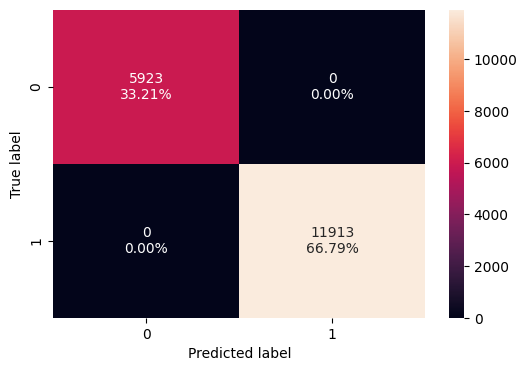

In [ ]:
# Confusion matrix for model 'model_dtree' on training set:
confusion_matrix_sklearn(model_dtree, X_train, y_train)

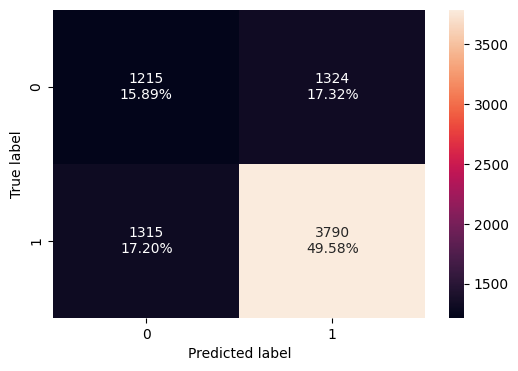

In [ ]:
# Confusion matrix for model 'model_dtree' on testing set:
confusion_matrix_sklearn(model_dtree, X_test, y_test)

In [ ]:
# Importance of features of model 'model_dtree'
print (pd.DataFrame(model_dtree.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
prevailing_wage       0.29271
no_of_employees       0.26491
yr_since_estab        0.17311
education_of_employee 0.11401
has_job_experience    0.04543


Observations on Decision tree model 'model_dtree':

*   The model can perfectly classify all the data points on the training set as it is allowed to grow to its full size. Since the accuracy of the model is 100% on the training set, we can say that each sample has been classified correctly.
*   Since the accuracy of the model is 100% on the train data and the accuracy of the model is 65.48% on the test data, we can also say that this model is overfitting the training data. Also, there is a huge difference between training and test scores for all the other metrics.
*   Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 100 | 65.48
Recall | 100 | 74.24
Precision | 100 | 74.11
F1-Score |  100 | 74.18

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 0 | 17.32
False Negative | 0 | 17.20

*   The top 5 most important features according to this model are prevailing_wage, no_of_employees, yr_since_estab, education_of_employee, has_job_experience.

#### **With balanced class weights**

In [ ]:
model_dtree_1 = DecisionTreeClassifier(class_weight='balanced', random_state=1)
model_dtree_1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [ ]:
dtree_1_perf_train = model_performance_classification_sklearn(model_dtree_1, X_train, y_train)
print('Training data performance:')
dtree_1_perf_train

Training data performance:


,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


In [ ]:
dtree_1_perf_test = model_performance_classification_sklearn(model_dtree_1, X_test, y_test)
print('Testing data performance:')
dtree_1_perf_test

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.64940,0.74554,0.73376,0.73960


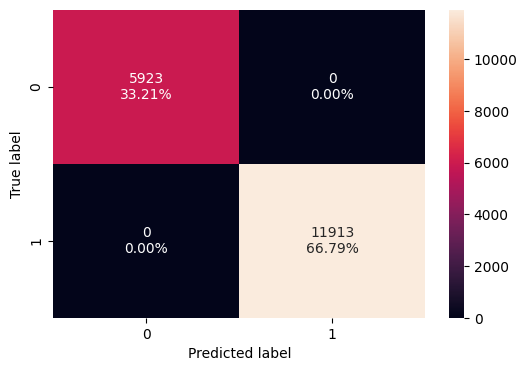

In [ ]:
# Confusion matrix for model 'model_dtree_1' on training set:
confusion_matrix_sklearn(model_dtree_1, X_train, y_train)

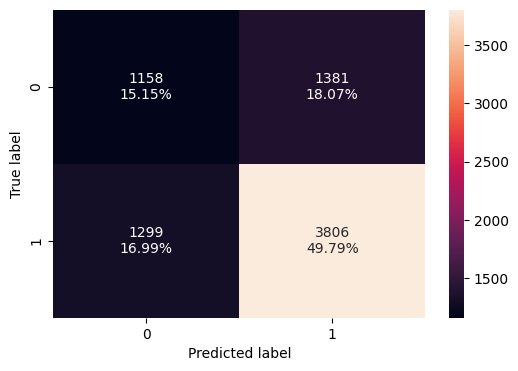

In [ ]:
# Confusion matrix for model 'model_dtree_1' on testing set:
confusion_matrix_sklearn(model_dtree_1, X_test, y_test)

In [ ]:
# Importance of features of model 'model_dtree_1'
print (pd.DataFrame(model_dtree_1.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
prevailing_wage       0.27912
no_of_employees       0.25762
yr_since_estab        0.16864
education_of_employee 0.12039
has_job_experience    0.05483


Observations on model 'model_dtree_1':

*   In terms of F1- score model 'model_dtree' performs slightly better on the test set as:

Model | F1-score
------|-------------
model_dtree | 74.18
model_dtree1 | 73.96

*   However, the model is still overfitting the training dataset.





### **Decision Tree Model - HyperParameter Tuning**

#### **With Balanced class weights**


In [ ]:
#Choose the type of classifier.
model_dtree_tuned = DecisionTreeClassifier(class_weight='balanced',random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,17,3),
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes': [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_dtree_tuned, parameters, scoring=scorer, n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=5,
                       random_state=1)

In [ ]:
dtree_tuned_perf_train = model_performance_classification_sklearn(model_dtree_tuned, X_train, y_train)
print('Training data performance:')
dtree_tuned_perf_train

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.72656,0.76479,0.81450,0.78887


In [ ]:
dtree_tuned_perf_test = model_performance_classification_sklearn(model_dtree_tuned, X_test, y_test)
print('Testing data performance:')
dtree_tuned_perf_test

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.72057,0.76552,0.80627,0.78537


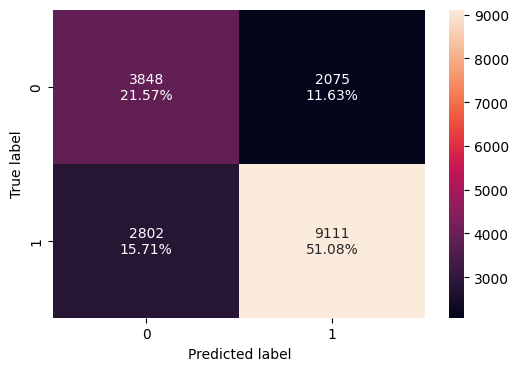

In [ ]:
# Confusion matrix for model 'model_dtree_tuned' on training set:
confusion_matrix_sklearn(model_dtree_tuned, X_train, y_train)

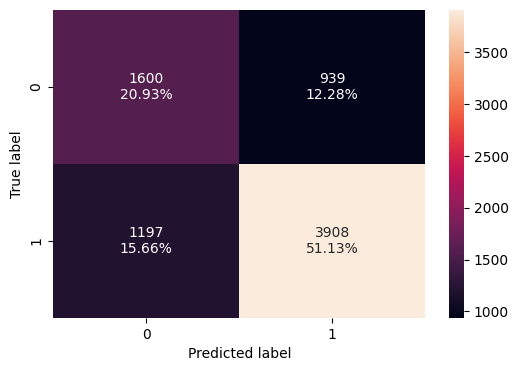

In [ ]:
# Confusion matrix for model 'model_dtree_tuned' on testing set:
confusion_matrix_sklearn(model_dtree_tuned, X_test, y_test)

In [ ]:
# Importance of features of model 'model_dtree_tuned'
print (pd.DataFrame(model_dtree_tuned.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
education_of_employee 0.50990
has_job_experience    0.22147
prevailing_wage       0.09887
continent_Europe      0.07349
unit_of_wage_Year     0.03461


Observations on model 'model_dtree_tuned':

*   The optimum values of hyper parameters after cross-validated grid-search are:
    *   max_depth = 8
    *   max_leaf_nodes = 15
    *   min_samples_leaf = 5
    *   min_impurity_decrease=0.0001
*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 72-73% which shows that the model can generalize well on unseen data.
*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 72.66 | 72.06
Recall | 76.48 | 76.55
Precision | 81.45 | 80.63
F1-Score |  78.89 | 78.54

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 11.63 | 12.28
False Negative | 15.71 | 15.66

*   The top 5 most important features according to this model are education_of_employee, has_job_experience, prevailing_wage, continent_Europe and unit_of_wage_Year.

### **Decision Tree Model - Cost Complexity Pruning**

In [ ]:
model_dtree_pruned = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = model_dtree_pruned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
# Training decision tree using the effective alphas :
clfs = []
for ccp_alpha in ccp_alphas:
    model_dtree_pruned = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    model_dtree_pruned.fit(X_train, y_train)
    clfs.append(model_dtree_pruned)

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [ ]:
# Creating the model where we get highest train and test F1 score:
index_best_model = np.argmax(f1_test)
best_dtree_model = clfs[index_best_model]
print(best_dtree_model)

DecisionTreeClassifier(ccp_alpha=0.0019001827433188373, class_weight='balanced',
                       random_state=1)


In [ ]:
dtree_pruned_perf_train = model_performance_classification_sklearn(best_dtree_model, X_train, y_train)
print('Training data performance:')
dtree_pruned_perf_train

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.72898,0.80299,0.79366,0.79830


In [ ]:
dtree_pruned_perf_test = model_performance_classification_sklearn(best_dtree_model, X_test, y_test)
print('Testing data performance:')
dtree_pruned_perf_test

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.72554,0.80294,0.78964,0.79623


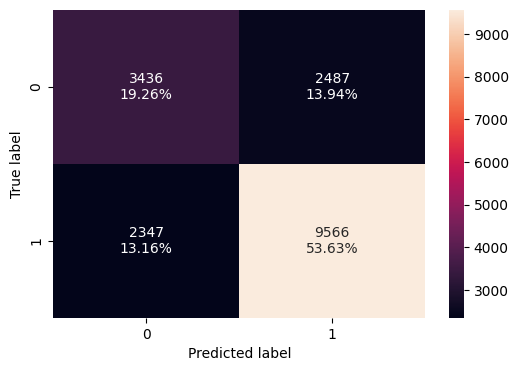

In [ ]:
# Confusion matrix for model 'best_dtree_model' on training set:
confusion_matrix_sklearn(best_dtree_model, X_train, y_train)

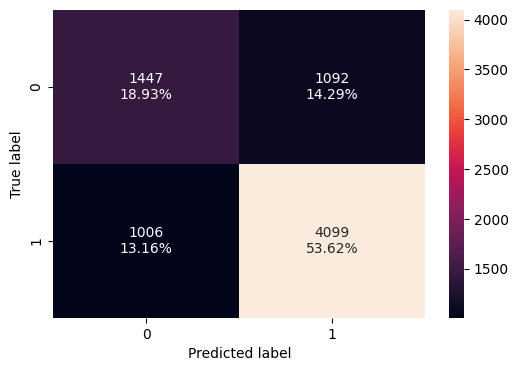

In [ ]:
# Confusion matrix for model 'best_dtree_model' on testing set:
confusion_matrix_sklearn(best_dtree_model, X_test, y_test)

In [ ]:
# Importance of features of model 'best_dtree_model'
print (pd.DataFrame(best_dtree_model.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
education_of_employee 0.55844
has_job_experience    0.24256
prevailing_wage       0.09308
continent_Europe      0.06801
unit_of_wage_Year     0.03791


Observations on model 'best_dtree_model':

*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 73% which shows that the model can generalize well on unseen data.
*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 72.90 | 72.55
Recall | 80.30 | 80.29
Precision | 79.37 | 78.96
F1-Score |  79.83 | 79.62

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 13.94 | 14.29
False Negative | 13.16 | 13.16

*   The top 5 most important features according to this model are education_of_employee, has_job_experience, prevailing_wage, continent_Europe and unit_of_wage_Year.

### **Bagging Classifier Model**

#### **Without balanced class weights**

In [ ]:
model_bagging = BaggingClassifier(random_state=1)
model_bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [ ]:
bagging_train_perf = model_performance_classification_sklearn(model_bagging, X_train, y_train)
print('Training data performance:')
bagging_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.98419,0.98506,0.99122,0.98813


In [ ]:
bagging_test_perf = model_performance_classification_sklearn(model_bagging, X_test, y_test)
print('Testing data performance:')
bagging_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.68550,0.76259,0.76559,0.76408


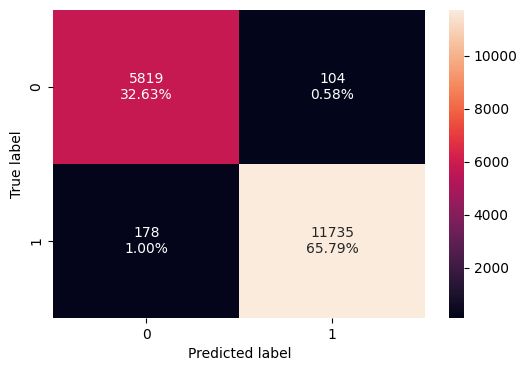

In [ ]:
# Confusion matrix for model 'model_bagging' on training set:
confusion_matrix_sklearn(model_bagging, X_train, y_train)

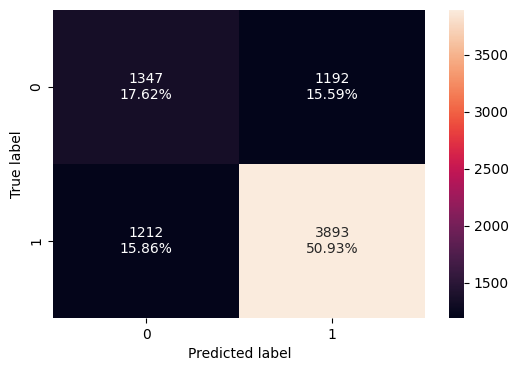

In [ ]:
# Confusion matrix for model 'model_bagging' on testing set:
confusion_matrix_sklearn(model_bagging, X_test, y_test)

Observations on model 'model_bagging':

*   Since the accuracy of the model is 98.42% on the train data and the accuracy of the model is 68.55% on the test data, we can say that this model is overfitting the training data. Also, there is a huge difference between training and test scores for all the other metrics.
*   The model is performing poorly on the test data set as shown below:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 98.42 | 68.55
Recall | 98.51 | 76.26
Precision | 99.12 | 76.56
F1-Score |  98.81 | 76.41

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 0.58 | 15.59
False Negative | 1.00 | 15.86

#### **With balanced class weights**

In [ ]:
model_bagging_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',random_state=1),
                                            random_state=1)
model_bagging_1.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  random_state=1)

In [ ]:
bagging_1_train_perf = model_performance_classification_sklearn(model_bagging_1, X_train, y_train)
print('Training data performance:')
bagging_1_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.98514,0.98691,0.99081,0.98886


In [ ]:
bagging_1_test_perf = model_performance_classification_sklearn(model_bagging_1, X_test, y_test)
print('Testing data performance:')
bagging_1_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.69061,0.77669,0.76397,0.77028


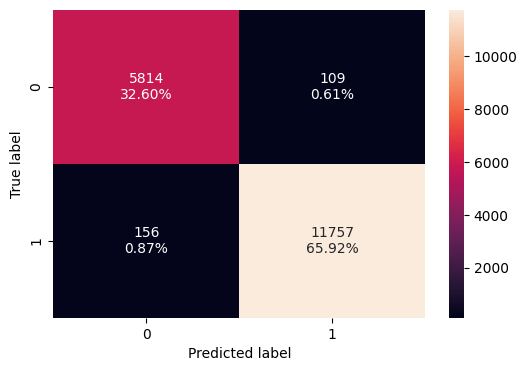

In [ ]:
# Confusion matrix for model 'model_bagging_1' on training set:
confusion_matrix_sklearn(model_bagging_1, X_train, y_train)

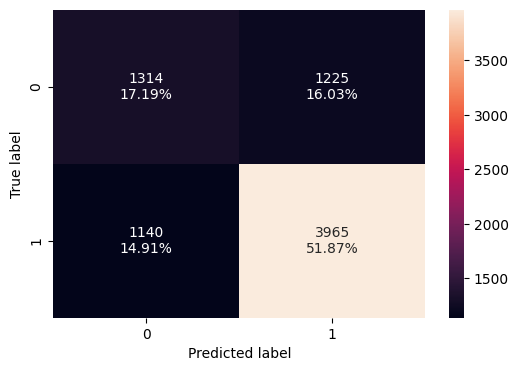

In [ ]:
# Confusion matrix for model 'model_bagging_1' on testing set:
confusion_matrix_sklearn(model_bagging_1, X_test, y_test)

Observations on model 'model_bagging_1':

*   In terms of F1- score this model performs slightly better model_bagging, than on the test set as:

Model | F1-score
------|-------------
model_bagging | 76.41
model_bagging_1 | 77.03

### **Bagging Classifier Model - Hyperparameter Tuning**

####**Base Estimator: Decision Tree**

In [ ]:
# Choose the type of classifier.
# Here, base model is decision tree:
model_bagging_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7,0.8,0.9],
    "max_features": [0.7,0.8,0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_bagging_tuned, parameters, scoring=scorer,n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

In [ ]:
bagging_tuned_train_perf = model_performance_classification_sklearn(model_bagging_tuned, X_train, y_train)
print('Training data performance:')
bagging_tuned_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.99237,0.99966,0.98904,0.99432


In [ ]:
bagging_tuned_test_perf = model_performance_classification_sklearn(model_bagging_tuned, X_test, y_test)
print('Testing data performance:')
bagging_tuned_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.72907,0.88286,0.75368,0.81317


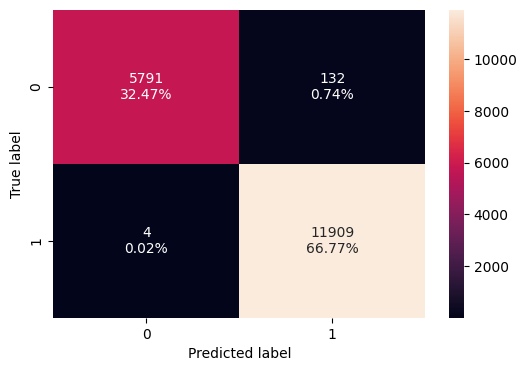

In [ ]:
# Confusion matrix for model 'model_bagging_tuned' on training set:
confusion_matrix_sklearn(model_bagging_tuned, X_train, y_train)

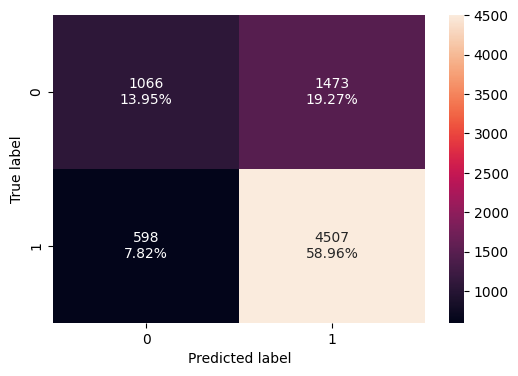

In [ ]:
# Confusion matrix for model 'model_bagging_tuned' on testing set:
confusion_matrix_sklearn(model_bagging_tuned, X_test, y_test)

Observations on model, 'model_bagging_tuned':

*   The optimum values of hyper parameters after cross-validated grid-search are:
    *   max_features = 0.7
    *   max_samples = 0.7
    *   n_estimators = 10
*   Since the accuracy of the model is 99.24% on the train data and the accuracy of the model is 72.91% on the test data, we can also say that this model is overfitting the training data. Also, there is a huge difference between training and test scores for all the other metrics.
*   The model is performing poorly on the test data set as shown below:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 99.24 | 72.91
Recall | 99.97 | 88.29
Precision | 98.90 | 75.37
F1-Score |  99.43 | 81.32

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 0.74 | 19.27
False Negative | 0.02 | 7.82

#### **Base Estimator: Decision Tree with balanced class weights**

In [ ]:
# Choose the type of classifier.
# Here, base model is decision tree with balanced class weights:
model_bagging_wt_tuned = BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',random_state=1),
                                            random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7,0.8,0.9],
    "max_features": [0.7,0.8,0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_bagging_wt_tuned, parameters, scoring=scorer,n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_bagging_wt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_bagging_wt_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

In [ ]:
bagging_model_wt_tuned_train_perf = model_performance_classification_sklearn(model_bagging_wt_tuned, X_train, y_train)
print('Training data performance:')
bagging_model_wt_tuned_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.99495,0.99966,0.99283,0.99624


In [ ]:
bagging_model_wt_tuned_test_perf = model_performance_classification_sklearn(model_bagging_wt_tuned, X_test, y_test)
print('Testing data performance:')
bagging_model_wt_tuned_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.72750,0.88560,0.75100,0.81276


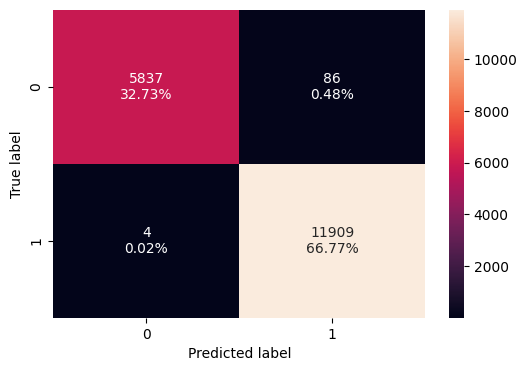

In [ ]:
# Confusion matrix for model 'model_bagging_wt_tuned' on training set:
confusion_matrix_sklearn(model_bagging_wt_tuned, X_train, y_train)

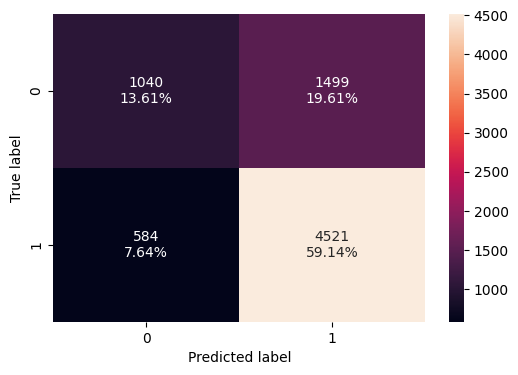

In [ ]:
# Confusion matrix for model 'model_bagging_wt_tuned' on testing set:
confusion_matrix_sklearn(model_bagging_wt_tuned, X_test, y_test)

Observations on model 'model_bagging_wt_tuned':

*   This model uses a decision tree with balanced class weights as its base model.
*   In terms of F1- score model model_bagging_tuned performs  slightly better on the test set as:

Model | F1-score
------|-------------
model_bagging_tuned | 81.32
model_bagging_wt_tuned | 81.28




### **Random Forest Model**

#### **Without balanced class weights**

In [ ]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
model_rf_train_perf = model_performance_classification_sklearn(model_rf, X_train, y_train)
print('Training data performance:')
model_rf_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


In [ ]:
model_rf_test_perf = model_performance_classification_sklearn(model_rf, X_test, y_test)
print('Testing data performance:')
model_rf_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.71795,0.83213,0.76582,0.79760


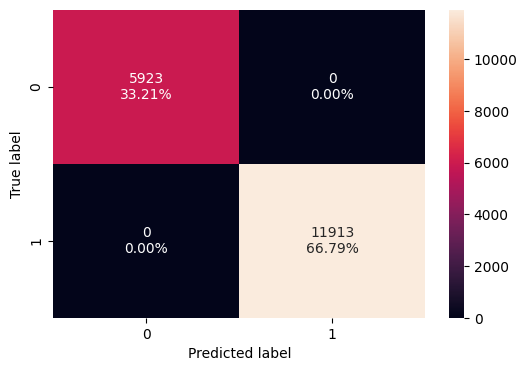

In [ ]:
# Confusion matrix for model 'model_rf' on training set:
confusion_matrix_sklearn(model_rf, X_train, y_train)

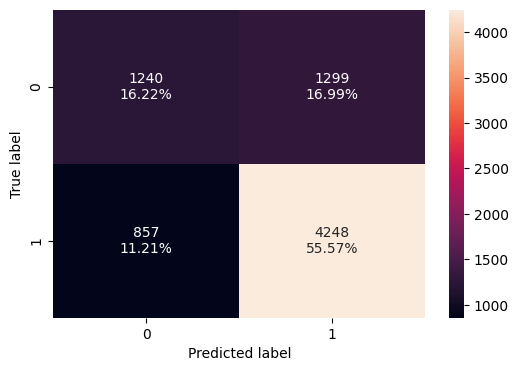

In [ ]:
# Confusion matrix for model 'model_rf' on testing set:
confusion_matrix_sklearn(model_rf, X_test, y_test)

In [ ]:
# Importance of features of model 'model_rf'
print (pd.DataFrame(model_rf.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
prevailing_wage       0.27545
no_of_employees       0.25743
yr_since_estab        0.20117
education_of_employee 0.12722
has_job_experience    0.04050


Observations on model 'model_rf':

*   Since the accuracy of the model is 100% on the train data and the accuracy of the model is 71.80% on the test data, we can also say that this model is overfitting the training data. Also, there is a huge difference between training and test scores for all the other metrics.
*   The model is performing poorly on the test data set as shown below:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 100 | 71.80
Recall | 100 | 83.21
Precision | 100 | 76.58
F1-Score |  100 | 79.76

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 0 | 16.99
False Negative | 0 | 11.21

*   The top 5 most important features are prevailing_wage, no_of_employees, yr_since_estab, education of employee and has_job_experience.


#### **With balanced class weights**

In [ ]:
model_rf_1 = RandomForestClassifier(class_weight='balanced', random_state=1)
model_rf_1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [ ]:
model_rf_1_train_perf = model_performance_classification_sklearn(model_rf_1, X_train, y_train)
print('Training data performance:')
model_rf_1_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


In [ ]:
model_rf_1_test_perf = model_performance_classification_sklearn(model_rf_1, X_test, y_test)
print('Testing data performance:')
model_rf_1_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.71886,0.83957,0.76318,0.79955


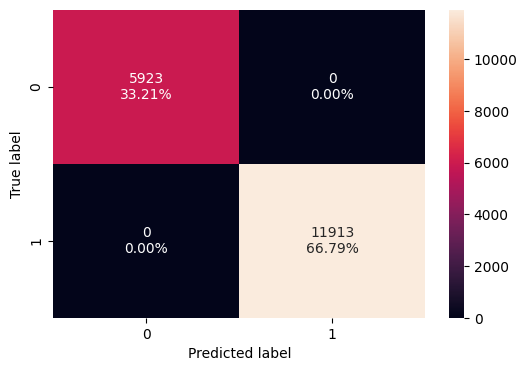

In [ ]:
# Confusion matrix for model 'model_rf_1' on training set:
confusion_matrix_sklearn(model_rf_1, X_train, y_train)

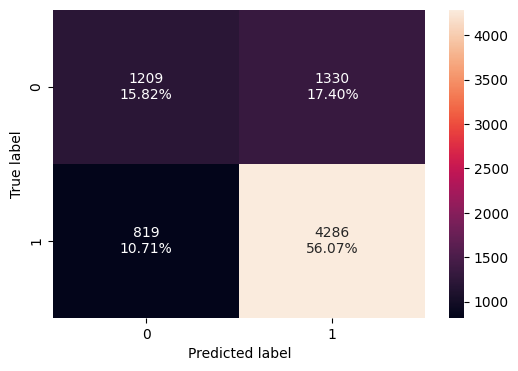

In [ ]:
# Confusion matrix for model 'model_rf_1' on testing set:
confusion_matrix_sklearn(model_rf_1, X_test, y_test)

In [ ]:
# Importance of features of model 'model_rf_1'
print (pd.DataFrame(model_rf_1.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
prevailing_wage       0.26863
no_of_employees       0.25134
yr_since_estab        0.19592
education_of_employee 0.13851
has_job_experience    0.04626


Observations on model 'model_rf_1':

*   Balanced class weights has been used.
*   In terms of F1- score, model_rf_1 performs slightly better than model_rf on the test set as:

Model | F1-score
------|-------------
model_rf | 79.76
model_rf_1 | 79.96

### **Random Forest Model - Hyperparameter Tuning**

#### **Without balanced class weights**

In [ ]:
# Choose the type of classifier.
model_rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": [0.6,0.7,0.8,0.9],
    'min_samples_split': np.arange(2, 20, 5),
    'n_estimators': np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_rf_tuned, parameters, scoring=scorer,n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.6, n_estimators=15,
                       oob_score=True, random_state=1)

In [ ]:
rf_tuned_train_perf = model_performance_classification_sklearn(model_rf_tuned, X_train, y_train)
print('Training data performance:')
rf_tuned_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.74058,0.91690,0.75021,0.82522


In [ ]:
rf_tuned_test_perf = model_performance_classification_sklearn(model_rf_tuned, X_test, y_test)
print('Testing data performance:')
rf_tuned_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.73195,0.91636,0.74254,0.82034


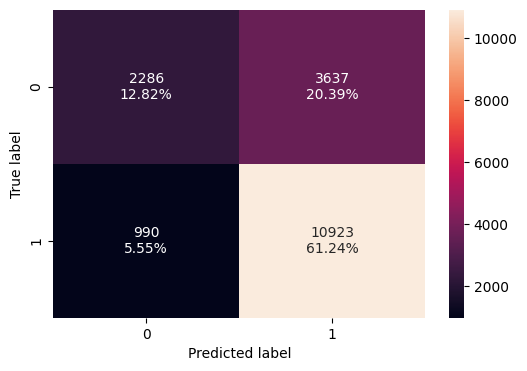

In [ ]:
# Confusion matrix for model 'model_rf_tuned' on training set:
confusion_matrix_sklearn(model_rf_tuned, X_train, y_train)

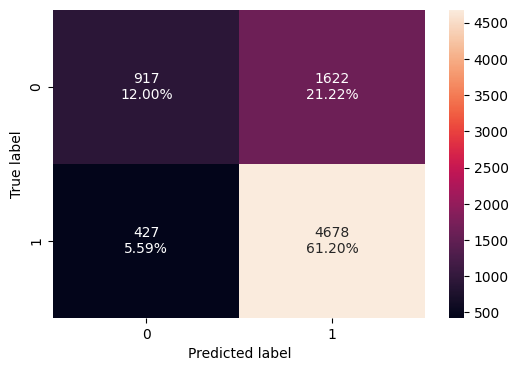

In [ ]:
# Confusion matrix for model 'model_rf_tuned' on testing set:
confusion_matrix_sklearn(model_rf_tuned, X_test, y_test)

In [ ]:
# Importance of features of model 'model_rf_tuned'
print (pd.DataFrame(model_rf_tuned.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
education_of_employee 0.49884
has_job_experience    0.16695
prevailing_wage       0.13912
continent_Europe      0.05891
unit_of_wage_Year     0.04758


Observations on Random Forest Classifier model 'model_rf_tuned':

*   The optimum values of hyperparameters after cross-validated grid search are:
    *   max_depth = 5
    *   max_features = 0.6
    *   n_estimators = 15

*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 73-74% which shows that the model can generalize well on unseen data.

*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 74.06 | 73.20
Recall | 91.69 | 91.64
Precision | 75.02 | 74.25
F1-Score |  82.52 | 82.03

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 20.39 | 21.22
False Negative | 5.55 | 5.59

*   The top 5 most important features according to this model are education_of_employee, has_job_experience, prevailing_wage, continent_Europe and unit_of_wage_Year.

#### **With balanced class weights**

In [ ]:
# Choose the type of classifier.
model_rf_tuned_1 = RandomForestClassifier(class_weight='balanced', random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": [0.6,0.7,0.8,0.9],
    'min_samples_split': np.arange(2, 20, 5),
    'n_estimators': np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_rf_tuned_1, parameters, scoring=scorer,n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_rf_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_rf_tuned_1.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=0.6,
                       min_samples_split=7, n_estimators=20, oob_score=True,
                       random_state=1)

In [ ]:
rf_tuned_1_train_perf = model_performance_classification_sklearn(model_rf_tuned_1, X_train, y_train)
print('Training data performance:')
rf_tuned_1_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.77203,0.79929,0.85041,0.82406


In [ ]:
rf_tuned_1_test_perf = model_performance_classification_sklearn(model_rf_tuned_1, X_test, y_test)
print('Testing data performance:')
rf_tuned_1_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.71324,0.75788,0.80187,0.77925


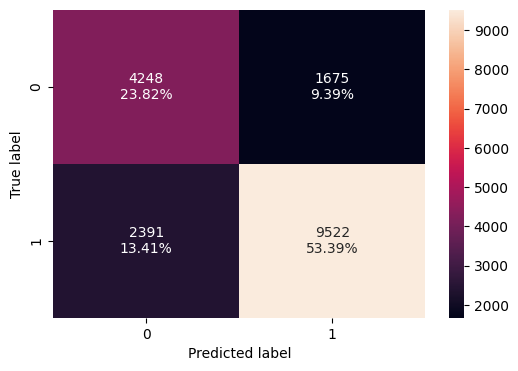

In [ ]:
# Confusion matrix for model 'model_rf_tuned_1' on training set:
confusion_matrix_sklearn(model_rf_tuned_1, X_train, y_train)

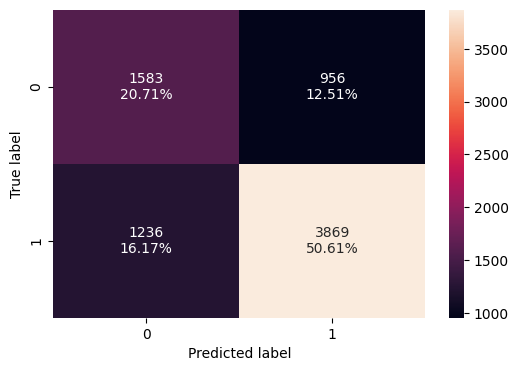

In [ ]:
# Confusion matrix for model 'model_rf_tuned_1' on testing set:
confusion_matrix_sklearn(model_rf_tuned_1, X_test, y_test)

In [ ]:
# Importance of features of model 'model_rf_tuned_1'
print (pd.DataFrame(model_rf_tuned_1.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
education_of_employee 0.34343
prevailing_wage       0.15822
has_job_experience    0.12913
no_of_employees       0.09792
yr_since_estab        0.07539


Observations on model 'model_rf_tuned_1':

*   The optimum values of hyper parameters after cross-validated grid-search are:
    *   max_depth = 10
    *   max_features = 0.6
    *   min_samples_split = 7
    *   n_estimators = 20
*   In terms of F1- score, model_rf_tuned performs slightly better on the test set as:

Model | F1-score
------|-------------
model_rf_tuned | 82.03
model_rf_tuned_1 | 77.93

### **Adaboost Model**

In [ ]:
model_abc = AdaBoostClassifier(random_state=1)
model_abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
model_abc_train_perf = model_performance_classification_sklearn(model_abc, X_train, y_train)
print('Training data performance:')
model_abc_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.73806,0.88953,0.75948,0.81938


In [ ]:
model_abc_test_perf = model_performance_classification_sklearn(model_abc, X_test, y_test)
print('Testing data performance:')
model_abc_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.73103,0.88443,0.75489,0.81454


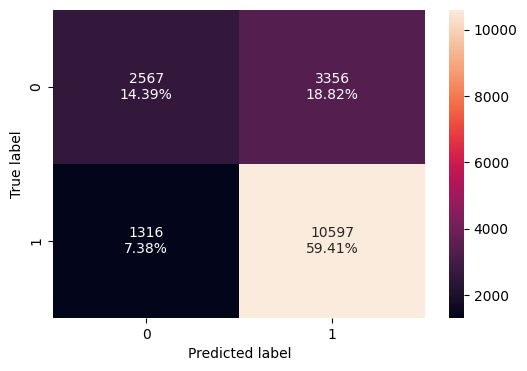

In [ ]:
# Confusion matrix for model 'model_abc' on training set:
confusion_matrix_sklearn(model_abc, X_train, y_train)

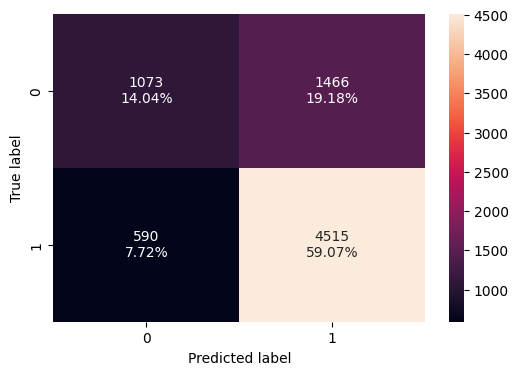

In [ ]:
# Confusion matrix for model 'model_abc' on testing set:
confusion_matrix_sklearn(model_abc, X_test, y_test)

In [ ]:
# Importance of features of model 'model_abc'
print (pd.DataFrame(model_abc.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                                 Imp
prevailing_wage              0.36000
no_of_employees              0.26000
yr_since_estab               0.12000
education_of_employee        0.08000
region_of_employment_Midwest 0.04000


Observations on model 'model_abc':

*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 73-74% which shows that the model can generalize well on unseen data.

*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 73.81 | 73.10
Recall | 88.95 | 88.44
Precision | 75.95 | 75.49
F1-Score |  81.94 | 81.45

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 18.82 | 19.18
False Negative | 7.38 | 7.72

*   The top 5 most important features according to this model are prevailing_wage, no_of_employees, yr_since_estab, education_of_employee, and region_of_employment_Midwest.


### **Adaboost Model - Hyperparameter Tuning**

####**Base Estimator: Decision Trees with max_depth = 1,2**

In [ ]:
# Choose the type of classifier.
model_abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
    ],
    "n_estimators": np.arange(80, 110, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_abc_tuned, parameters, scoring=scorer,n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
model_abc_tuned_train_perf = model_performance_classification_sklearn(model_abc_tuned, X_train, y_train)
print('Training data performance:')
model_abc_tuned_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.75039,0.87988,0.77627,0.82483


In [ ]:
model_abc_tuned_test_perf = model_performance_classification_sklearn(model_abc_tuned, X_test, y_test)
print('Testing data performance:')
model_abc_tuned_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.73875,0.87287,0.76775,0.81694


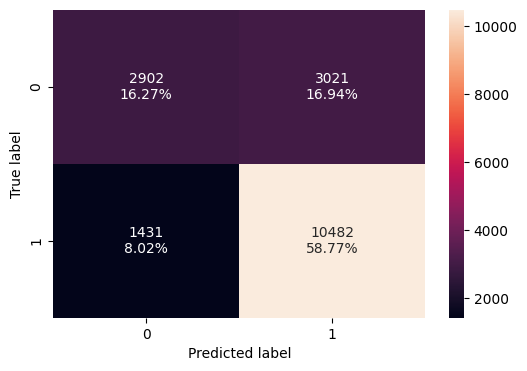

In [ ]:
# Confusion matrix for model 'model_abc_tuned' on training set:
confusion_matrix_sklearn(model_abc_tuned, X_train, y_train)

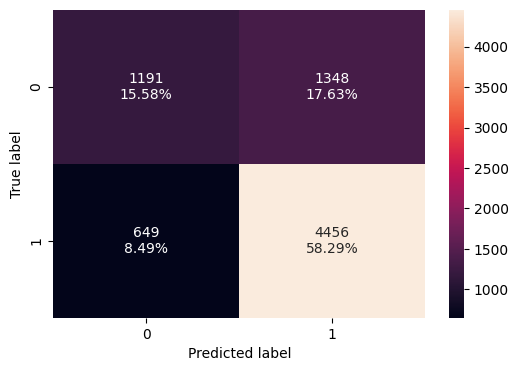

In [ ]:
# Confusion matrix for model 'model_abc_tuned' on testing set:
confusion_matrix_sklearn(model_abc_tuned, X_test, y_test)

In [ ]:
# Importance of features of model 'model_abc_tuned'
print (pd.DataFrame(model_abc_tuned.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
education_of_employee 0.29294
prevailing_wage       0.12578
has_job_experience    0.11202
no_of_employees       0.09434
continent_Europe      0.07871


Observations on model 'model_abc_tuned':

*   The optimum values of hyperparameters after cross-validated grid search are:
    *   Decision Trees with max_depth = 2
    *   learning_rate = 0.1
    *   n_estimators = 100

*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 74-75% which shows that the model can generalize well on unseen data.

*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 75.04 | 73.88
Recall | 87.99 | 87.29
Precision | 77.63 | 76.78
F1-Score |  82.48 | 81.69

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 16.94 | 17.63
False Negative | 8.02 | 8.49

*   The top 5 most important features according to this model are education_of_employee, prevailing_wage, has_job_experience, no_of_employees, and continent_Europe.

####**Base Estimator: Decision Trees with max_depth = 1,2, balanced class weights**

In [ ]:
# Choose the type of classifier.
# Here, base estimators are decision trees with balanced class weights:
model_abc_tuned_1= AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight='balanced', random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight='balanced', random_state=1),
    ],
    "n_estimators": np.arange(80, 110, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_abc_tuned_1, parameters, scoring=scorer,n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_abc_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_abc_tuned_1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
model_abc_tuned_1_train_perf = model_performance_classification_sklearn(model_abc_tuned_1, X_train, y_train)
print('Training data performance:')
model_abc_tuned_1_train_perf

Training data performance:


,Accuracy,Recall,Precision,F1
0,0.71933,0.78200,0.79454,0.78822


In [ ]:
model_abc_tuned_1_test_perf = model_performance_classification_sklearn(model_abc_tuned_1, X_test, y_test)
print('Testing data performance:')
model_abc_tuned_1_test_perf

Testing data performance:


,Accuracy,Recall,Precision,F1
0,0.71651,0.78159,0.79135,0.78644


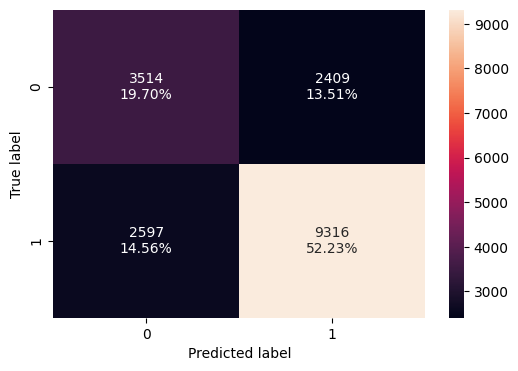

In [ ]:
# Confusion matrix for model 'model_abc_tuned_1' on training set:
confusion_matrix_sklearn(model_abc_tuned_1, X_train, y_train)

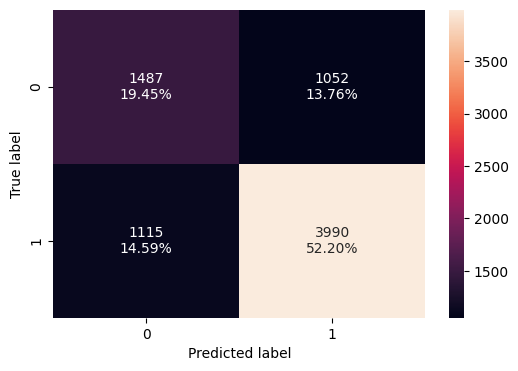

In [ ]:
# Confusion matrix for model 'model_abc_tuned_1' on testing set:
confusion_matrix_sklearn(model_abc_tuned_1, X_test, y_test)

In [ ]:
# Importance of features of model 'model_abc_tuned_1'
print (pd.DataFrame(model_abc_tuned_1.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                                 Imp
education_of_employee        0.35000
has_job_experience           0.17000
region_of_employment_Midwest 0.12000
continent_Europe             0.11000
region_of_employment_South   0.09000


Observations on model 'model_abc_tuned_1':

*   The optimum values of hyperparameters after cross-validated grid search are:
    *   Decision Tree with max_depth = 1
    *   learning_rate = 0.1
    *   n_estimators = 100
*   In terms of F1- score the previous model, ie model_abc_tuned performs slightly better on the test set as:

Model | F1-score
------|-------------
model_abc_tuned | 81.69
model_abc_tuned_1 | 78.64

### **Gradient Boost Model**

In [ ]:
model_gbc = GradientBoostingClassifier(random_state=1)
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
model_gbc_train_perf=model_performance_classification_sklearn(model_gbc,X_train,y_train)
print("Training performance:")
model_gbc_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.75673,0.87904,0.78325,0.82838


In [ ]:
model_gbc_test_perf=model_performance_classification_sklearn(model_gbc,X_test,y_test)
print("Testing performance:")
model_gbc_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.74398,0.87365,0.77270,0.82008


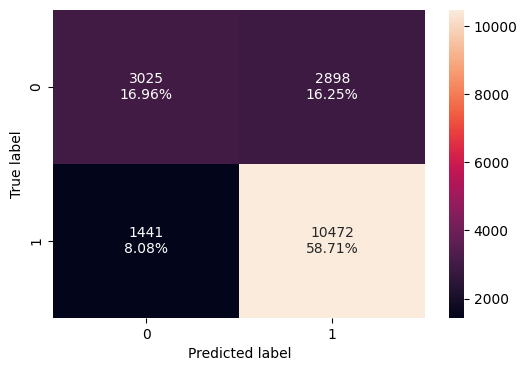

In [ ]:
# Confusion matrix for model 'model_gbc' on training set:
confusion_matrix_sklearn(model_gbc, X_train, y_train)

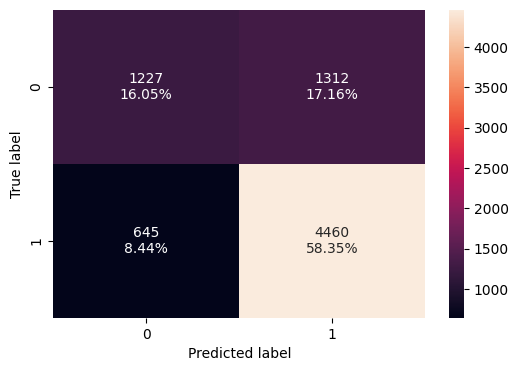

In [ ]:
# Confusion matrix for model 'model_gbc' on testing set:
confusion_matrix_sklearn(model_gbc, X_test, y_test)

In [ ]:
# Importance of features of model 'model_gbc'
print (pd.DataFrame(model_gbc.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                          Imp
education_of_employee 0.48469
has_job_experience    0.16559
prevailing_wage       0.12348
continent_Europe      0.05693
unit_of_wage_Year     0.03566


Observations on model 'model_gbc':

*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 74-76% which shows that the model can generalize well on unseen data.

*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 75.68 | 74.40
Recall | 87.90 | 87.37
Precision | 78.33 | 77.27
F1-Score |  82.84 | 82.01

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 16.25 | 17.16
False Negative | 8.08 | 8.44

*   The top 5 most important features according to this model are education_of_employee, has_job_experience, prevailing_wage, continent_Europe and unit_of_wage_Year.


### **Gradient Boost Model - Hyperparameter Tuning**

#### **Base Estimator: Decision Trees**

In [ ]:
# Choose the type of classifier.
model_gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1.0],
    "max_features":[0.7,0.8,0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_gbc_tuned, parameters, scoring=scorer,n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.9, random_state=1, subsample=0.8)

In [ ]:
model_gbc_tuned_train_perf=model_performance_classification_sklearn(model_gbc_tuned,X_train,y_train)
print("Training performance:")
model_gbc_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.75572,0.87744,0.78300,0.82753


In [ ]:
model_gbc_tuned_test_perf=model_performance_classification_sklearn(model_gbc_tuned,X_test,y_test)
print("Testing performance:")
model_gbc_tuned_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.74411,0.87189,0.77368,0.81986


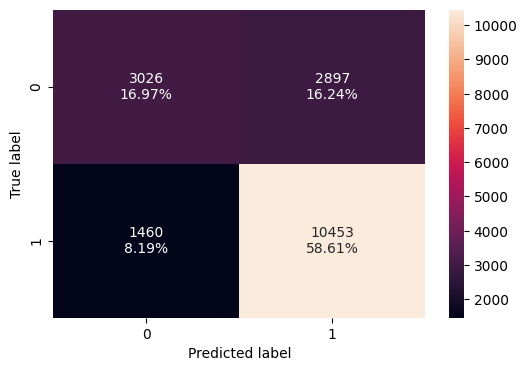

In [ ]:
# Confusion matrix for model 'model_gbc_tuned' on training set:
confusion_matrix_sklearn(model_gbc_tuned, X_train, y_train)

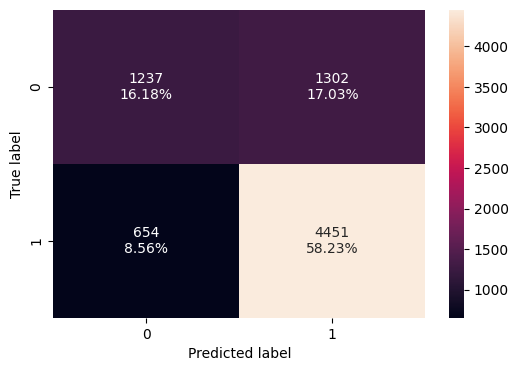

In [ ]:
# Confusion matrix for model 'model_gbc_tuned' on testing set:
confusion_matrix_sklearn(model_gbc_tuned, X_test, y_test)

In [ ]:
# Importance of features of model 'model_gbc_tuned'
print (pd.DataFrame(model_gbc_tuned.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                                 Imp
education_of_employee        0.47236
has_job_experience           0.15524
prevailing_wage              0.13841
continent_Europe             0.05125
region_of_employment_Midwest 0.03356


Observations on Gradient Boost Classifier model 'model_gbc_tuned':

*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 74-76% which shows that the model can generalize well on unseen data.

*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 75.57 | 74.41
Recall | 87.74 | 87.19
Precision | 78.30 | 77.37
F1-Score |  82.75 | 81.99

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 16.24 | 17.03
False Negative | 8.19 | 8.56

*   The top 5 most important features according to this model are education_of_employee, has_job_experience, prevailing_wage, continent_Europe and region_of_employment_Midwest.

#### **Init Estimator: AdaBoost Classifier**


In [ ]:
# Choose the type of classifier.
# Here, init model = AdaBosst Classifier.
model_gbc_tuned_1 = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1.0],
    "max_features":[0.7,0.8,0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1)}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_gbc_tuned_1, parameters, scoring=scorer,n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_gbc_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_gbc_tuned_1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, random_state=1, subsample=0.8)

In [ ]:
model_gbc_tuned_1_train_perf=model_performance_classification_sklearn(model_gbc_tuned_1,X_train,y_train)
print("Training performance:")
model_gbc_tuned_1_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.75617,0.87870,0.78283,0.82800


In [ ]:
model_gbc_tuned_1_test_perf=model_performance_classification_sklearn(model_gbc_tuned_1,X_test,y_test)
print("Testing performance:")
model_gbc_tuned_1_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.74294,0.87189,0.77247,0.81918


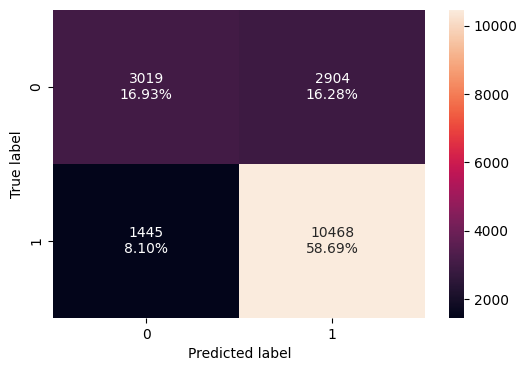

In [ ]:
# Confusion matrix for model 'model_gbc_tuned_1' on training set:
confusion_matrix_sklearn(model_gbc_tuned_1, X_train, y_train)

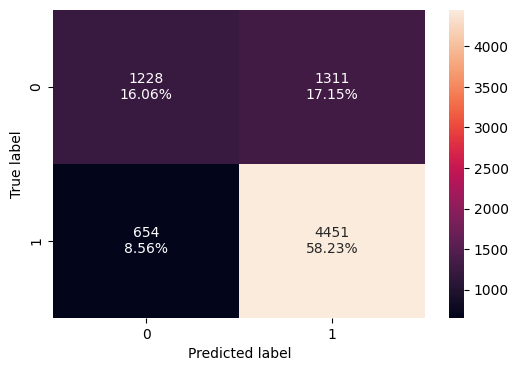

In [ ]:
# Confusion matrix for model 'model_gbc_tuned_1' on testing set:
confusion_matrix_sklearn(model_gbc_tuned_1, X_test, y_test)

In [ ]:
# Importance of features of model 'model_gbc_tuned_1'
print (pd.DataFrame(model_gbc_tuned_1.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                                 Imp
education_of_employee        0.46657
has_job_experience           0.15710
prevailing_wage              0.13846
continent_Europe             0.05322
region_of_employment_Midwest 0.03174


Observations on model 'model_gbc_tuned_1':

*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 74-76% which shows that the model can generalize well on unseen data.

*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 75.62 | 74.29
Recall | 87.87 | 87.19
Precision | 78.28 | 77.25
F1-Score |  82.80 | 81.92

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 16.28 | 17.15
False Negative | 8.10 | 8.56

*   The top 5 most important features according to this model are education_of_employee, has_job_experience, prevailing_wage, continent_Europe, and region_of_employment_Midwest.

*   The performance of this model is very close to that of model 'model_gbc_tuned'.

### **XGBoost Model**

In [ ]:
model_xgb = XGBClassifier(random_state=1, eval_metric='logloss')
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [ ]:
model_xgb_train_perf=model_performance_classification_sklearn(model_xgb,X_train,y_train)
print("Training performance:")
model_xgb_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.83606,0.92638,0.84354,0.88302


In [ ]:
model_xgb_test_perf=model_performance_classification_sklearn(model_xgb,X_test,y_test)
print("Testing performance:")
model_xgb_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.73142,0.85700,0.76781,0.80996


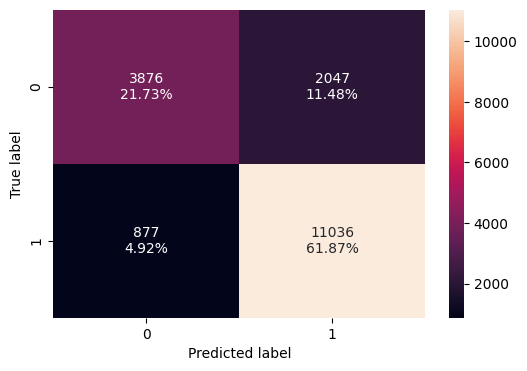

In [ ]:
# Confusion matrix for model 'model_xgb' on training set:
confusion_matrix_sklearn(model_xgb, X_train, y_train)

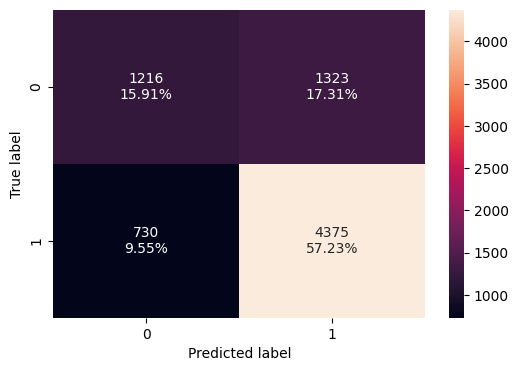

In [ ]:
# Confusion matrix for model 'model_xgb' on testing set:
confusion_matrix_sklearn(model_xgb, X_test, y_test)

In [ ]:
# Importance of features of model 'model_xgb'
print (pd.DataFrame(model_xgb.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                                 Imp
education_of_employee        0.27179
has_job_experience           0.12571
continent_Europe             0.11572
unit_of_wage_Year            0.10818
region_of_employment_Midwest 0.06267


Observations on model 'model_xgb':

*    The different metric values for the training and test sets are similar, which shows that the model is not overfitting. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 83.61 | 73.14
Recall | 92.64 | 85.70
Precision | 84.35 | 76.78
F1-Score | 88.30 | 80.97

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 11.48 | 17.31
False Negative | 4.92 | 9.55

*   The top 5 most important features according to this model are  education_of_employee, has_job_experience, continent_Europe, unit_of_wage_Year and region_of_employment_Midwest.

### **XGBoost Model - Hyperparameter Tuning**

In [ ]:
# Choose the type of classifier.
model_xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_xgb_tuned, parameters, scoring=scorer,n_jobs=-1, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [ ]:
model_xgb_tuned_train_perf=model_performance_classification_sklearn(model_xgb_tuned,X_train,y_train)
print("Training performance:")
model_xgb_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.76200,0.88391,0.78629,0.83225


In [ ]:
model_xgb_tuned_test_perf=model_performance_classification_sklearn(model_xgb_tuned,X_test,y_test)
print("Testing performance:")
model_xgb_tuned_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.74424,0.87248,0.77353,0.82003


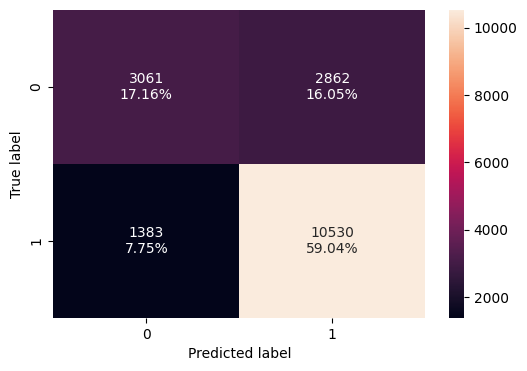

In [ ]:
# Confusion matrix for model 'model_xgb_tuned' on training set:
confusion_matrix_sklearn(model_xgb_tuned, X_train, y_train)

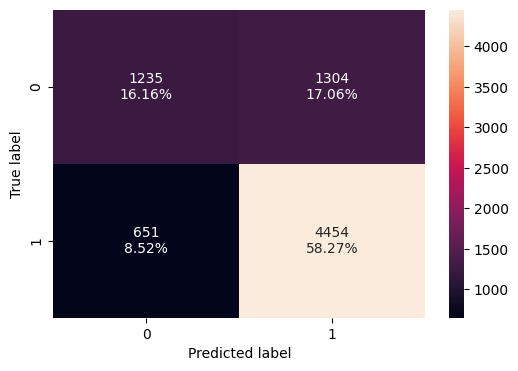

In [ ]:
# Confusion matrix for model 'model_xgb_tuned' on testing set:
confusion_matrix_sklearn(model_xgb_tuned, X_test, y_test)

In [ ]:
# Importance of features of model 'model_xgb_tuned'
print (pd.DataFrame(model_xgb_tuned.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False).head())

                                   Imp
education_of_employee          0.27130
has_job_experience             0.19639
unit_of_wage_Year              0.07897
continent_Europe               0.06980
region_of_employment_Northeast 0.05520


Observations on model 'model_xgb_tuned':

*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 74-76% which shows that the model can generalize well on unseen data.

*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 76.20 | 74.42
Recall | 88.39 | 87.25
Precision | 78.63 | 77.35
F1-Score |  83.26 | 82.00

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 16.05 | 17.06
False Negative | 7.75 | 8.52

*   The top 5 most important features according to this model are education_of_employee, has_job_experience, unit_of_wage_Year, continent_Europe, and region_of_employment_Northeast.

### **Stacking Classifier Model**

In [ ]:
estimators = [
    ("AdaBoost", model_abc_tuned),
    ("Gradient Boosting", model_gbc_tuned_1),
    ("Random Forest", model_rf_tuned),
]

final_estimator = model_xgb_tuned

model_stacking_classifier =StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
model_stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Random Forest',
                                RandomForestCl...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=150, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

In [ ]:
stacking_train_perf = model_performance_classification_sklearn(model_stacking_classifier,X_train,y_train)
print("Training performance:")
stacking_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.75606,0.87711,0.78352,0.82768


In [ ]:
stacking_test_perf=model_performance_classification_sklearn(model_stacking_classifier,X_test,y_test)
print("Testing performance:")
stacking_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.74424,0.87052,0.77449,0.81970


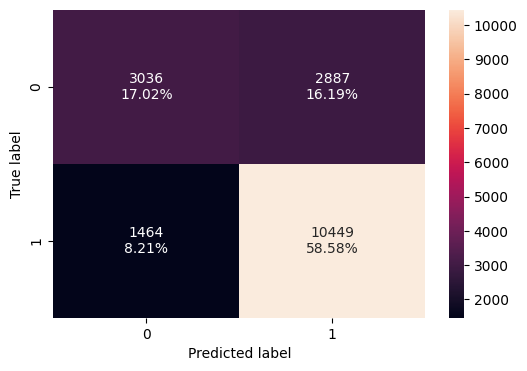

In [ ]:
# Confusion matrix for model 'model_stacking_classifier' on training set:
confusion_matrix_sklearn(model_stacking_classifier, X_train, y_train)

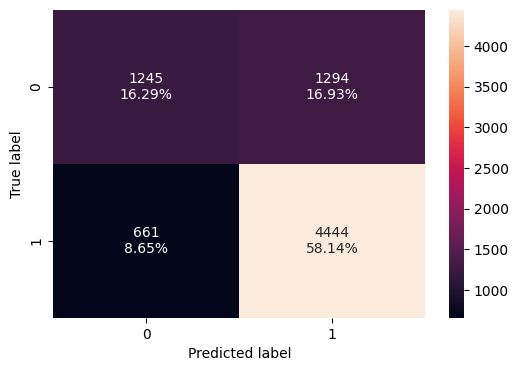

In [ ]:
# Confusion matrix for model 'model_stacking_classifier' on testing set:
confusion_matrix_sklearn(model_stacking_classifier, X_test, y_test)

Observations on model 'model_stacking_classifier':

*   The model is giving a generalized result since the accuracy scores on both the train and test data are coming to be around 74-76% which shows that the model can generalize well on unseen data.

*    The different metric values for the training and test sets are similar. Below are the different metric scores on the training and test datasets:

Metric | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
Accuracy | 75.61 | 74.42
Recall | 87.71 | 87.05
Precision | 78.35 | 77.45
F1-Score |  82.77 | 81.97

*   Below are the percentages of FP and FN identified by the model on the training and test datasets:

Type | Training Dataset(%) | Test Dataset(%)
-------|------------------|--------------
False Positive | 16.19 | 16.93
False Negative | 8.21 | 8.65

## **Model Performance Comparison and Conclusions**

In [ ]:
index_name= ['Decision tree', 'Decision tree with balanced wts.', 'Hyperparameter Tuned Decision Tree', 'Post Pruned Decision Tree',
              'Bagging Model', 'Bagging Model with balanced wts.', 'Hyperparameter Tuned Bagging Model', 'Hyperparameter Tuned Bagging Model with balanced wts.',
              'Random Forest', 'Random Forest with Balanced wts.', 'Hyperparameter Tuned Random Forest', 'Hyperparameter Tuned Random Forest with balanced wts.',
              'AdaBoost Model', 'Hyperparameter Tuned AdaBoost Model', 'Hyperparameter Tuned AdaBoost Model with balanced wts.',
              'Gradient Boost Model', 'Hyperparameter Tuned Gradient Boost Model', 'Gradient Boost Model with AdaBoost as init model',
              'XGBoost Model', 'Hyperparameter Tuned XGBoost Model',
              'Stacking Classifier Model']

In [ ]:
model_name = ['model_dtree', 'model_dtree_1', 'model_dtree_tuned', 'model_dtree_pruned',
              'model_bagging', 'model_bagging_1', 'model_bagging_tuned', 'model_bagging_wt_tuned',
              'model_rf', 'model_rf_1', 'model_rf_tuned', 'model_rf_tuned_1',
              'model_abc', 'model_abc_tuned', 'model_abc_tuned_1',
              'model_gbc', 'model_gbc_tuned', 'model_gbc_tuned_1',
              'model_xgb', 'model_xgb_tuned',
              'model_stacking_classifier']

In [ ]:
train_perf_dfs = [dtree_perf_train, dtree_1_perf_train, dtree_tuned_perf_train, dtree_pruned_perf_train,
                   bagging_train_perf, bagging_1_train_perf, bagging_tuned_train_perf, bagging_model_wt_tuned_train_perf,
                   model_rf_train_perf, model_rf_1_train_perf, rf_tuned_train_perf, rf_tuned_1_train_perf,
                   model_abc_train_perf, model_abc_tuned_train_perf, model_abc_tuned_1_train_perf,
                   model_gbc_train_perf, model_gbc_tuned_train_perf, model_gbc_tuned_1_train_perf,
                   model_xgb_train_perf, model_xgb_tuned_train_perf, stacking_train_perf]

In [ ]:
test_perf_dfs = [dtree_perf_test, dtree_1_perf_test, dtree_tuned_perf_test, dtree_pruned_perf_test,
            bagging_test_perf, bagging_1_test_perf, bagging_tuned_test_perf, bagging_model_wt_tuned_test_perf,
            model_rf_test_perf, model_rf_1_test_perf, rf_tuned_test_perf, rf_tuned_1_test_perf,
            model_abc_test_perf, model_abc_tuned_test_perf, model_abc_tuned_1_test_perf,
            model_gbc_test_perf, model_gbc_tuned_test_perf, model_gbc_tuned_1_test_perf,
            model_xgb_test_perf, model_xgb_tuned_test_perf,
            stacking_test_perf]

In [ ]:
# Training Dataset metrics
acc_train = [x['Accuracy'][0] for x in train_perf_dfs]
recall_train = [x['Recall'][0] for x in train_perf_dfs]
precision_train = [x['Precision'][0] for x in train_perf_dfs]
f1_train = [x['F1'][0] for x in train_perf_dfs]

In [ ]:
# Test dataset metrics
acc_test = [x['Accuracy'][0] for x in test_perf_dfs]
recall_test = [x['Recall'][0] for x in test_perf_dfs]
precision_test = [x['Precision'][0] for x in test_perf_dfs]
f1_test = [x['F1'][0] for x in test_perf_dfs]

In [ ]:
# Creating dataframe comtaining performance metrics for both training and testing data:
performance_df = pd.DataFrame()
performance_df['model_name'] = model_name
performance_df.index = index_name
performance_df['Training Data Accuracy'] = acc_train
performance_df['Test Data Accuracy'] = acc_test
performance_df['Training Data Recall'] = recall_train
performance_df['Test Data Recall'] = recall_test
performance_df['Training Data Precision'] = precision_train
performance_df['Test Data Precision'] = precision_test
performance_df['Training Data F1 score'] = f1_train
performance_df['Test Data F1 score'] = f1_test

In [ ]:
performance_df

,model_name,Training Data Accuracy,Test Data Accuracy,Training Data Recall,Test Data Recall,Training Data Precision,Test Data Precision,Training Data F1 score,Test Data F1 score
Decision tree,model_dtree,1.00000,0.65476,1.00000,0.74241,1.00000,0.74110,1.00000,0.74176
Decision tree with balanced wts.,model_dtree_1,1.00000,0.64940,1.00000,0.74554,1.00000,0.73376,1.00000,0.73960
Hyperparameter Tuned Decision Tree,model_dtree_tuned,0.72656,0.72057,0.76479,0.76552,0.81450,0.80627,0.78887,0.78537
Post Pruned Decision Tree,model_dtree_pruned,0.72898,0.72554,0.80299,0.80294,0.79366,0.78964,0.79830,0.79623
Bagging Model,model_bagging,0.98419,0.68550,0.98506,0.76259,0.99122,0.76559,0.98813,0.76408
Bagging Model with balanced wts.,model_bagging_1,0.98514,0.69061,0.98691,0.77669,0.99081,0.76397,0.98886,0.77028
Hyperparameter Tuned Bagging Model,model_bagging_tuned,0.99237,0.72907,0.99966,0.88286,0.98904,0.75368,0.99432,0.81317
Hyperparameter Tuned Bagging Model with balanced wts.,model_bagging_wt_tuned,0.99495,0.72750,0.99966,0.88560,0.99283,0.75100,0.99624,0.81276
Random Forest,model_rf,1.00000,0.71795,1.00000,0.83213,1.00000,0.76582,1.00000,0.79760
Random Forest with Balanced wts.,model_rf_1,1.00000,0.71886,1.00000,0.83957,1.00000,0.76318,1.00000,0.79955


Observations:


*   To maximize F1-Score: Model 'model_rf_tuned' gives the highest F1-score on test data of almost 82.5%, while its training F1-score is almost 82%. Model 'model_xgb_tuned' has a similar performance to 'model_rf_tuned' in terms of F1-score.
*   To maximize Recall Score: Model 'model_rf_tuned' gives the highest recall score on test data of almost 91.6%, while its training dataset score is almost 91.7%. Model 'model_gbc' has the next highest recall score on the testing dataset of almost 87.4% and a training dataset score of almost 87.9%.
*   To maximize Precision Score: Model 'model_dtree_tuned' gives the highest precision score on test data of almost 80.6% and a score of almost 81.5% on the training dataset. Models 'model_rf_tuned_1' and 'model_abc_tune_1' have the next highest precision scores on test data (almost 80.1% and 79.1% respectively).
*   To maximize Accuracy Score: Model 'model_xgb_tuned' gives the highest accuracy score of almost 74.4% on test data, and a score of 76.2% on training dataset. Model 'model_stacking_classifier' also has the same test accuracy with training dataset accuracuy of almost 87.9%.




## **Actionable Insights and Recommendations**

### **Insights:**

*   Majority of visa applications are from Asia (66.2%) while the lowest percentage of visa applicants is from Oceania (0.8%).
*   Most visa applicants have a Bachelor's Degree (40.2%), while Doctorate applicants have the lowest percentage of visa applications (8.6%).
*   Most visa applicants have prior experience (58.1%).
*   Most visa applicants (ie, 88.4%) do not need job training.
*   Most visa applications have North-Eastern US as their intended region of employment(28.2%). Percentage of people applying to work in the Island region of the US is the least(1.5%).
*   Most visa applicants are paid on a yearly basis(90.1%), followed by an hourly basis(8.5%). Wage set monthly is the least common(0.3%).
*   Most cases have full-time job positions (ie, 89.4%). Only 10.4% of the cases do not have full-time positions.
*   Most cases (almost two-thirds) are certified. Only one-third of the visa applications are denied.
*   The oldest year of establishment in the dataset is 1800, while the latest is 2016.
*   The average prevailing wage in the dataset is $74455.81.
*   There is a huge variation in the number of employees in different companies. The minimum number of employees a company has is 11 while the maximum number of employees is 602069.
On average a company has 5667 employees which is higher than the median value of 2109.
*   Europe has the highest percentage of certified visa applications (79.23%) while South America has the lowest percentage of certified visa applications (57.86%).
*   Applicants with a doctorate have the highest percentage of certified visa applications(87.23%) while applicants with a High School degree have the highest percentage of denied visa applications (34.06%).
*   Chances of visa certification increase if the applicant has prior work experience.
*   Applicant who needs job training is equally likely to have certified visa status as an applicant who does not require job training.
*   Applications with Mid-Western as their intended region of employment have the highest percentage of certified visa statuses, while the Island region has the lowest.
*   The cases that have been certified have higher prevailing wages than the ones that were denied.
*   Chances of visa certification increase if the applicant is renumerated on a yearly basis, while it is lowest if he/she is paid on an hourly basis.
*   The average value of prevailing wage is highest in the Island region and lowest in the Northeast region.
*   Applicants without job experience have a higher average prevailing wage as compared to applicants with prior job experience.
*   Applicants with Master's degrees are offered the highest wages, followed by those who have Bachelor's degrees. Applicants with Doctorate are offered the lowest wages, followed by those who have a High School degree.
*   Applicants who do not require job training have a lower average prevailing wage as compared to applicants who require job training.
*   Jobs in the Island region of US have the highest average prevailing wage , while North-East has the lowest average prevailing wage.




















### **Conclusions and Recommendations:**

*   EasyVisa's main aim is to balance the trade-off between losing a work opportunity for US citizens in the case of FP and losing a suitable human resource that can contribute to the economy in the case of FN.
*   Hence, F1-score has been emphasized as the metric of interest here and the model has been tuned on F1-Score.
*   The models that have the highest F1-score on test data are :

Model Name | F1-score on Training dataset (%) | F1-Score on Test Dataset(%)
-----------|------------------------------|-------------------------
model_rf_tuned | 82.034 | 82.522
model_xgb_tuned | 82.003 | 83.225

*   As these models do not tend to overfit the training dataset, they will be able to provide generalized results on unseen data. Hence, these models can be considered good for predicting the status of the visa application based on the important features.
*   The higher f1-scores of the models ensure higher chances of minimizing both False Negatives and False Positives - These models will help to maintain a balance between providing a work opportunity to a US citizen and allowing a non-US citizen to work in the country so that they contribute towards the economic growth of the country.
*   The most important features that affect the status of a visa application are education_of_employee and has_job_experience.
*   Other important features that affect the certification of a visa application (not necessarily in this order, in the models mentioned above) are prevailing_wage, unit_of_wage_Year, continent_Europe, and region_of_employment_NorthEast.
*   With increase in education level of the applicant, chances of visa approval increases. Following table gives the percentages of visa applications that are certified concerning education levels:

Continent | Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Doctorate | 87.23
Master's | 78.63
Bachelor's | 62.21
High School | 34.06

*   Chances of visa certification increase if the applicant has prior work experience. The following table gives the percentages of visa statuses concerning prior job experience:

Prior Job Experience | Visa Status |Percentage of Visa Applications (%)
----------|------------|------------------------------------------
Yes | Certified | 74.48
No | Certified | 56.14
Yes | Denied | 25.52
No | Denied | 43.87

*   Percentage of applicants who are renumerated yearly is the highest and hence the chances of visa certification are highest when the unit of wages is yearly. The percentage of certified visa applications concerning unit of wage decreases in the order as shown below:

Unit of Wage |Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Year | 69.89
Week | 62.13
Month | 61.80
Hour | 34.63

*   Europe has the highest percentage of certified visa applications followed by Africa and Asia. Following table gives the continents with percentages of visa applications that are certified:

Continent | Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Europe | 79.23
Africa | 72.05
Asia | 65.31
Oceania | 63.54
North America | 61.88
South America | 57.86

*   Following table gives the percentages of certified visa status concerning the intended region of employment:

Intended Job Location |Percentage of Certified Visa Applications (%)
----------|------------------------------------------
Mid-West | 75.53
South | 70.02
North-East | 62.90
West | 62.25
Island | 60.27

*   The cases that have been certified have higher prevailing wages than the ones that were denied, as shown below:

Case Status | Average Prevailing Wage($)
------------|---------------------------
Certified | 77293.62
Denied | 68748.68

*   EasyVisa needs to look into the normalization of the prevailing wages. Also, for easier analysis, the different units of wages should be converted into one common unit.  
*   EasyVisa needs to further investigate the work duration of an applicant so that the prevailing wages can be normalized.
*   EasyVisa needs to further investigate the reasons for the surprising trends such as
  *   Applicants without job experience have a higher average prevailing wage as compared to applicants with prior job experience.
  *   Applicant who needs job training is equally likely to have certified visa status as an applicant who does not require job training.
  *   Applicants with Doctorate are offered the lowest wages.
* To further expedite the visa procurement process, Easy Visa can look into sorting the case files according to the education of the applicant and their prior experience.
